In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import time, warnings
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import datetime as dt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!gdown https://drive.google.com/file/d/1dB3Ybd46Ag4w68JwbabeaO2yma3D-Slo/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1dB3Ybd46Ag4w68JwbabeaO2yma3D-Slo
To: /content/websale.csv
100% 38.8M/38.8M [00:01<00:00, 19.8MB/s]


In [ ]:
df = pd.read_csv('/content/websale.csv',encoding="ISO-8859-1",dtype={'TransID': str,'AccountID': str})
df.head()

,TransID,AccountID,AccountName,PortalCode,GameCode,GameServer,NickName,PackageID,GameAmount,TopupAmount,...,OsName,OSVersion,Device,StatusAddItem,AddItemTime,ItemList,UpdateStatusAddItemCount,UpdatedUser,UpdatedTime,VersionApp
0,1000011,3650206,fb_1030192227992593,Funzy,bietdoi,10066,Sindulcie,1318,98,98,...,iOS,NaN,NaN,1,2023-08-17 09:48:49.720,dundun.funzy.ios199,1,None,2023-08-17 09:48:49.583,1.3.0
1,1000013,3604503,fb_6431906926907132,Funzy,bietdoi,10047,Báº¥t Biáº¿n,1320,498,498,...,iOS,NaN,NaN,1,2023-08-17 09:48:54.153,dundun.funzy.ios999,1,None,2023-08-17 09:48:54.030,1.3.0
2,1000014,3576917,fid_12RBK7CQ,Funzy,bietdoi,10034,ÄÃ¤ hÃ«Ã¶à¦,1314,998,998,...,Android,NaN,NaN,1,2023-08-17 09:48:56.223,dundun.funzy.and1999,1,None,2023-08-17 09:48:55.980,1.0.0
3,1000017,3732234,gg_106040687124253107606,Funzy,bietdoi,10024,247690,89,0,45,...,iOS,NaN,NaN,1,2023-08-17 09:49:09.377,221,1,None,2023-08-17 09:49:09.307,NaN
4,1000018,3596920,fid_12ZIHD7R,Funzy,bietdoi,10058,150180,114,0,218,...,iOS,NaN,NaN,1,2023-08-17 09:49:29.347,204,1,None,2023-08-17 09:49:29.260,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145051 entries, 0 to 145050
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   TransID                   145051 non-null  object
 1   AccountID                 145051 non-null  object
 2   AccountName               145051 non-null  object
 3   PortalCode                145051 non-null  object
 4   GameCode                  145051 non-null  object
 5   GameServer                145051 non-null  object
 6   NickName                  145051 non-null  object
 7   PackageID                 145051 non-null  int64 
 8   GameAmount                145051 non-null  int64 
 9   TopupAmount               145051 non-null  int64 
 10  PaymentType               145051 non-null  int64 
 11  PaymentName               145051 non-null  object
 12  TopupDesc                 145051 non-null  object
 13  Status                    145051 non-null  int64 
 14  IsTo

In [ ]:
df['TopupTime'] = pd.to_datetime(df['TopupTime'])
df['TopupDate'] = pd.to_datetime(df['TopupDate'])
df['AddItemTime'] = pd.to_datetime(df['AddItemTime'])
df['UpdatedTime'] = pd.to_datetime(df['UpdatedTime'])

In [ ]:
new_df = df[(df[[ 'TopupDate', 'AddItemTime', 'UpdatedTime']] >= '2023-07-19').all(axis=1)& (df['GameCode'] == 'bietdoi') & ~df['GameServer'].isin([1, 50001])]
new_df.head()

,TransID,AccountID,AccountName,PortalCode,GameCode,GameServer,NickName,PackageID,GameAmount,TopupAmount,...,OsName,OSVersion,Device,StatusAddItem,AddItemTime,ItemList,UpdateStatusAddItemCount,UpdatedUser,UpdatedTime,VersionApp
0,1000011,3650206,fb_1030192227992593,Funzy,bietdoi,10066,Sindulcie,1318,98,98,...,iOS,NaN,NaN,1,2023-08-17 09:48:49.720,dundun.funzy.ios199,1,None,2023-08-17 09:48:49.583,1.3.0
1,1000013,3604503,fb_6431906926907132,Funzy,bietdoi,10047,Báº¥t Biáº¿n,1320,498,498,...,iOS,NaN,NaN,1,2023-08-17 09:48:54.153,dundun.funzy.ios999,1,None,2023-08-17 09:48:54.030,1.3.0
2,1000014,3576917,fid_12RBK7CQ,Funzy,bietdoi,10034,ÄÃ¤ hÃ«Ã¶à¦,1314,998,998,...,Android,NaN,NaN,1,2023-08-17 09:48:56.223,dundun.funzy.and1999,1,None,2023-08-17 09:48:55.980,1.0.0
3,1000017,3732234,gg_106040687124253107606,Funzy,bietdoi,10024,247690,89,0,45,...,iOS,NaN,NaN,1,2023-08-17 09:49:09.377,221,1,None,2023-08-17 09:49:09.307,NaN
4,1000018,3596920,fid_12ZIHD7R,Funzy,bietdoi,10058,150180,114,0,218,...,iOS,NaN,NaN,1,2023-08-17 09:49:29.347,204,1,None,2023-08-17 09:49:29.260,NaN


In [ ]:
#new_df.describe()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74524 entries, 0 to 145050
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransID                   74524 non-null  object        
 1   AccountID                 74524 non-null  object        
 2   AccountName               74524 non-null  object        
 3   PortalCode                74524 non-null  object        
 4   GameCode                  74524 non-null  object        
 5   GameServer                74524 non-null  object        
 6   NickName                  74524 non-null  object        
 7   PackageID                 74524 non-null  int64         
 8   GameAmount                74524 non-null  int64         
 9   TopupAmount               74524 non-null  int64         
 10  PaymentType               74524 non-null  int64         
 11  PaymentName               74524 non-null  object        
 12  TopupDesc        

### Phân tích dữ liệu

#### Tính doanh thu hàng ngày

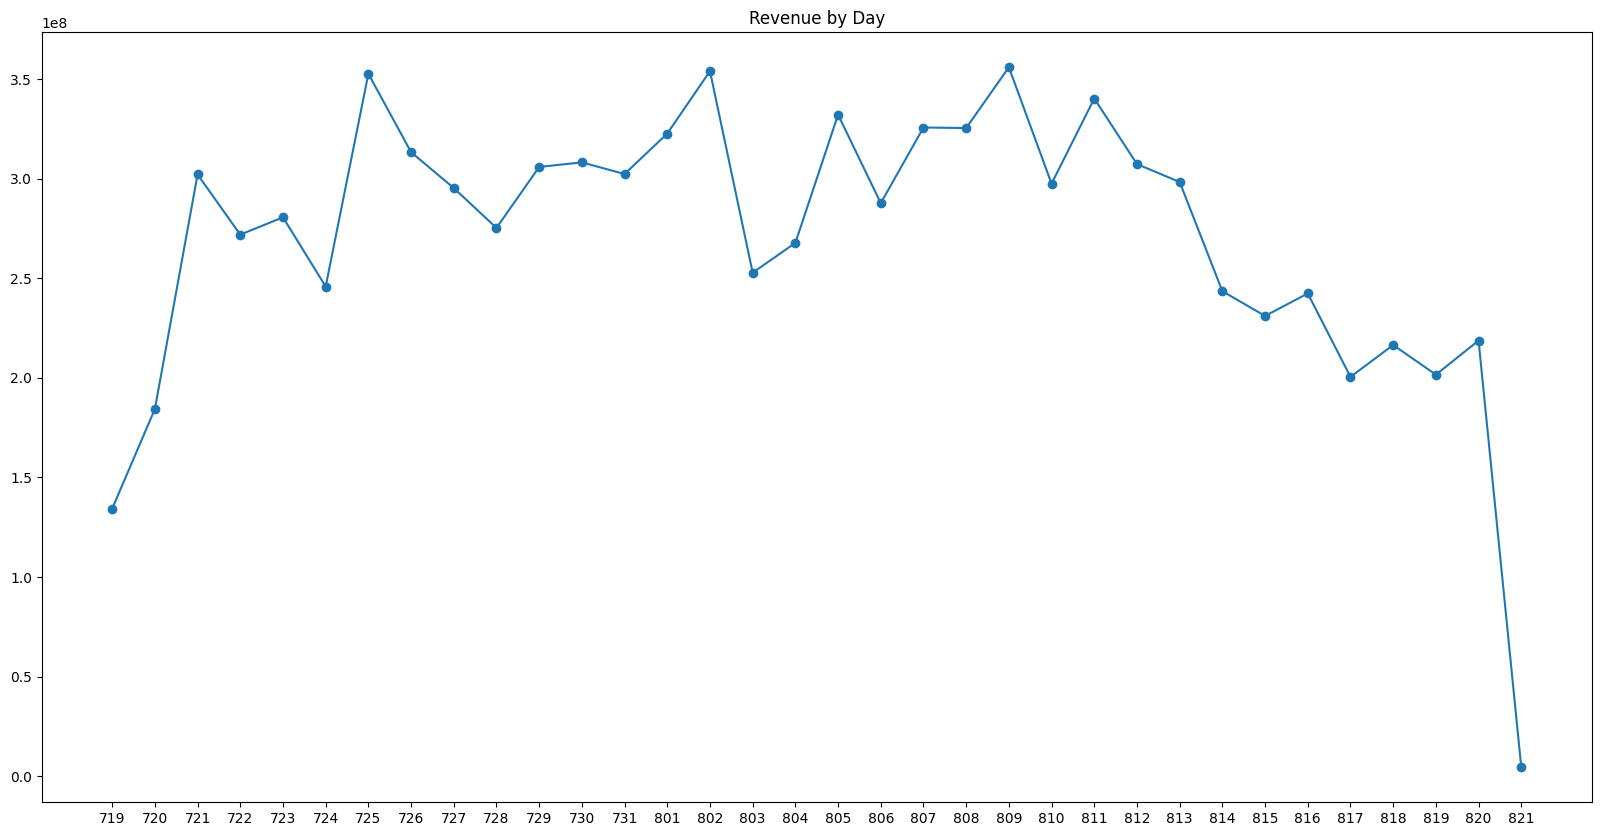

In [ ]:
new_df['TopupTime'] = pd.to_datetime(new_df['TopupTime'])
new_df['DayKey'] = new_df['TopupTime'].map(lambda date: 100*date.month+ date.day)
new_df['Revenue'] = new_df['TopupAmount'] * 500
revenue_by_day = new_df.groupby(['DayKey'])['Revenue'].sum().reset_index()
#print(revenue_by_day)

# plot data
revenue_by_day['DayKey'] = revenue_by_day['DayKey'].apply(str)
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('DayKey', 'Revenue', data=revenue_by_day, linestyle='-', marker='o')
plt.title("Revenue by Day")
plt.show()


#### Tăng trưởng doanh thu

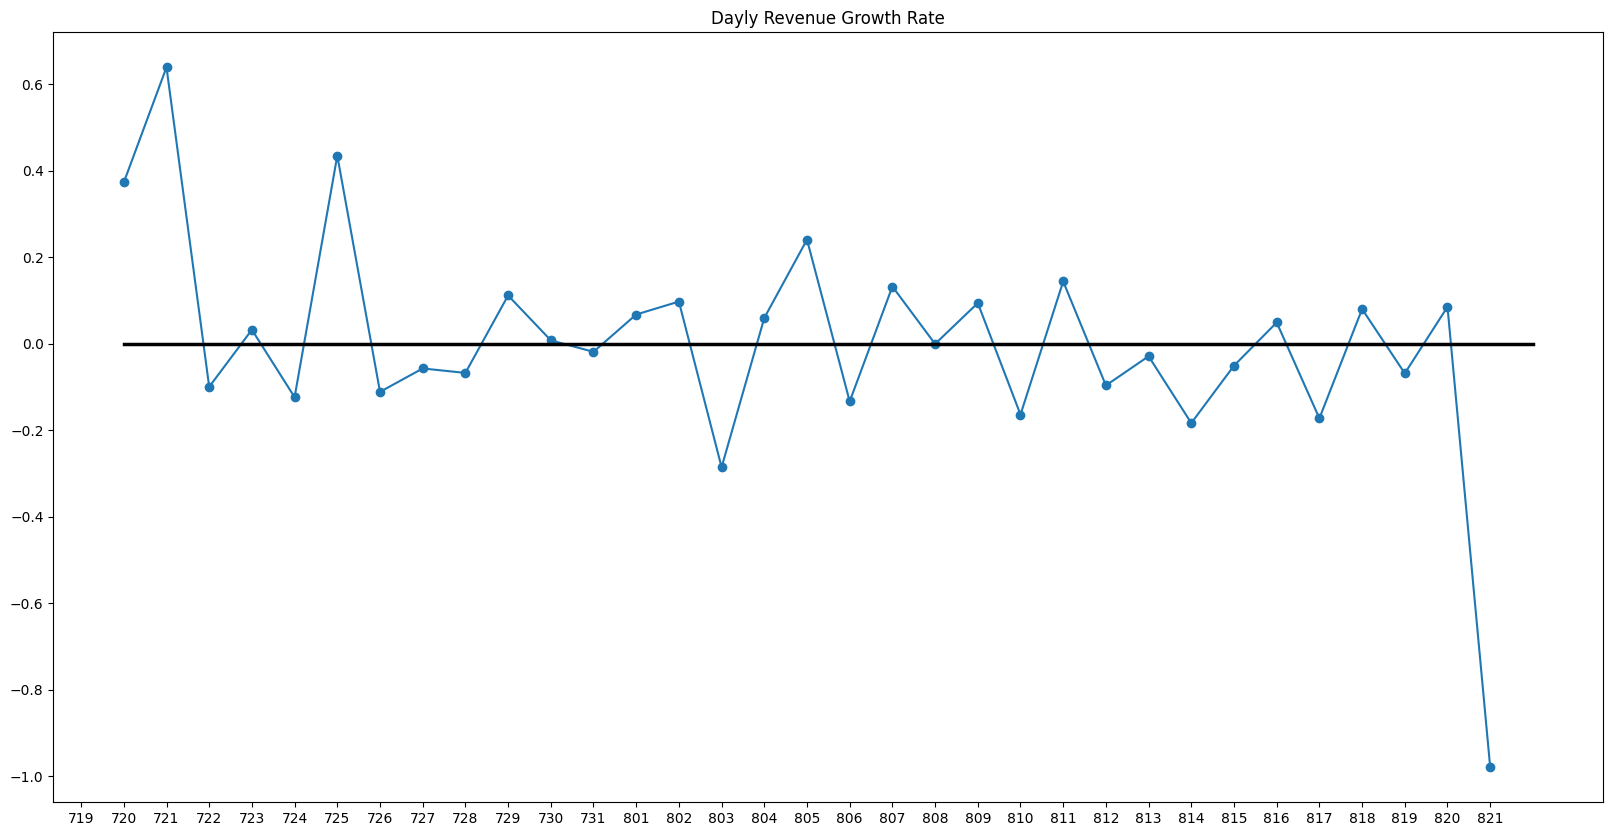

In [ ]:
revenue_by_day['DaylyGrowth'] = revenue_by_day['Revenue'].pct_change()


# Plot data
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('DayKey', 'DaylyGrowth', data=revenue_by_day, linestyle='-', marker='o')
plt.plot(range(1,len(revenue_by_day.index)+1),[0 for i in range(len(revenue_by_day.index))], color="k", lw=2.5)
plt.title("Dayly Revenue Growth Rate")
plt.show()


##### Số lượng khách hàng hàng ngày

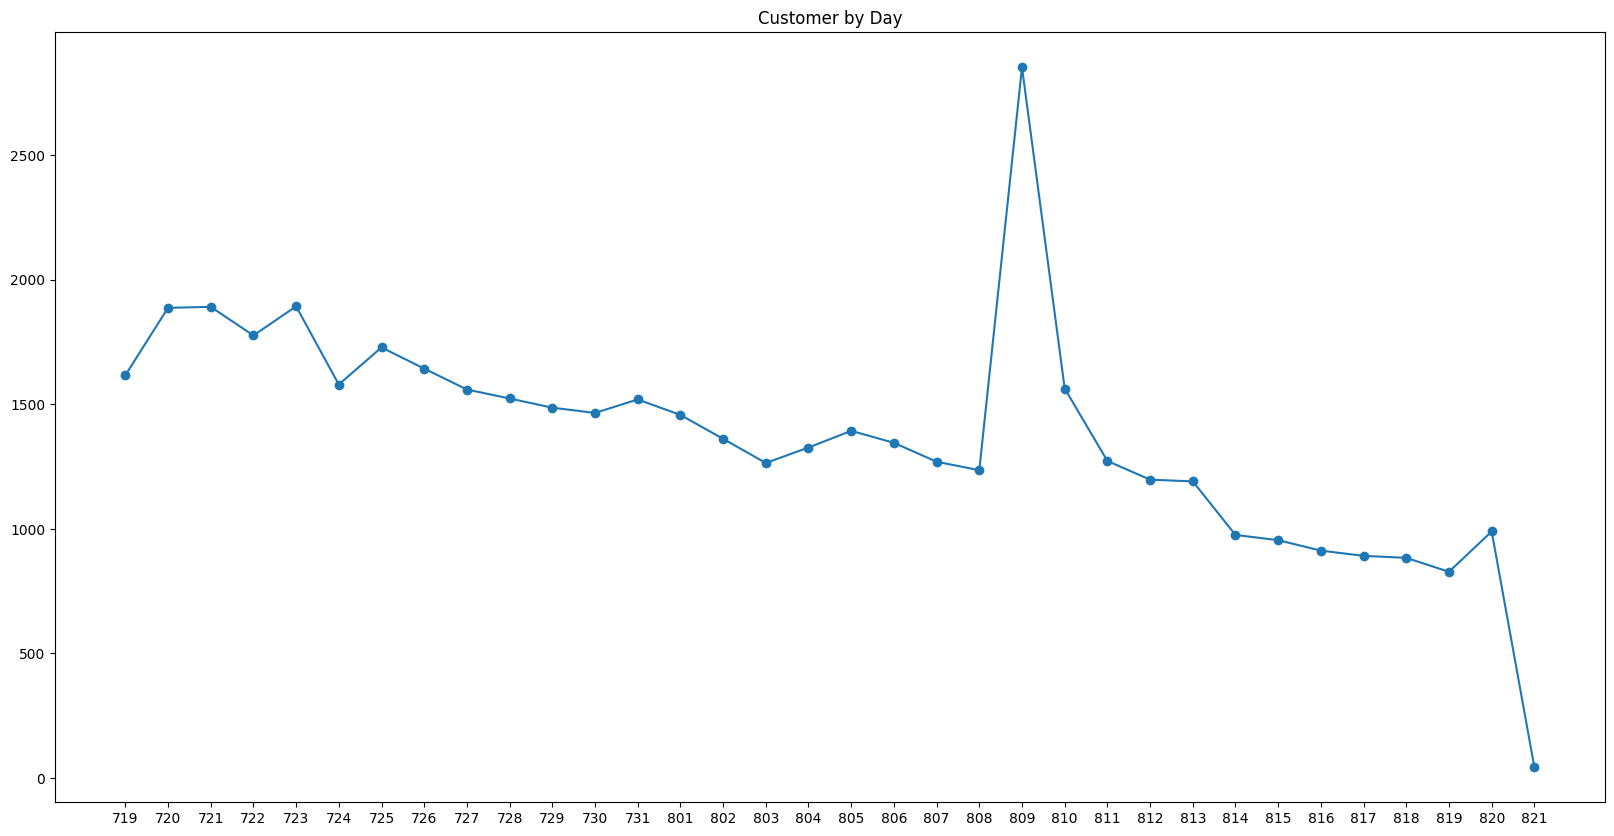

In [ ]:
customer_by_day = new_df.groupby(['DayKey'])['AccountID'].nunique().reset_index()
customer_by_day


customer_by_day['DayKey'] = customer_by_day['DayKey'].apply(str)
#matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('DayKey', 'AccountID', data=customer_by_day, linestyle='-', marker='o')
plt.title("Customer by Day")
plt.show()


##### Số lượng giao dịch hàng ngày

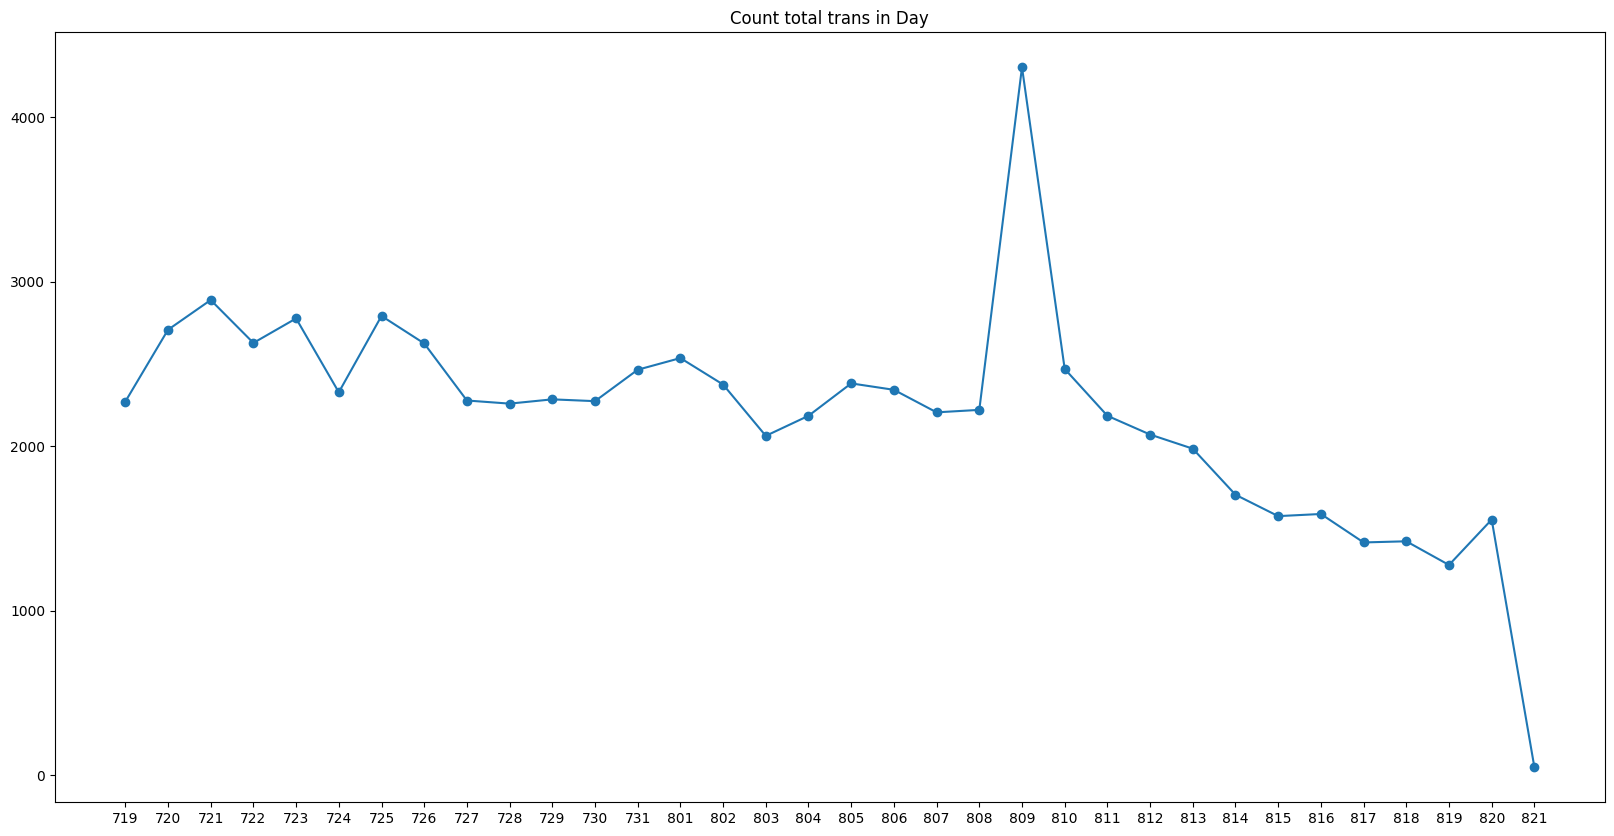

In [ ]:
order_by_day = new_df.groupby(['DayKey'])['TransID'].count().reset_index()
order_by_day
order_by_day['DayKey'] = order_by_day['DayKey'].apply(str)
#matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('DayKey', 'TransID', data=order_by_day, linestyle='-', marker='o')
plt.title("Count total trans in Day")
plt.show()


##### Doanh thu trung bình hàng ngày

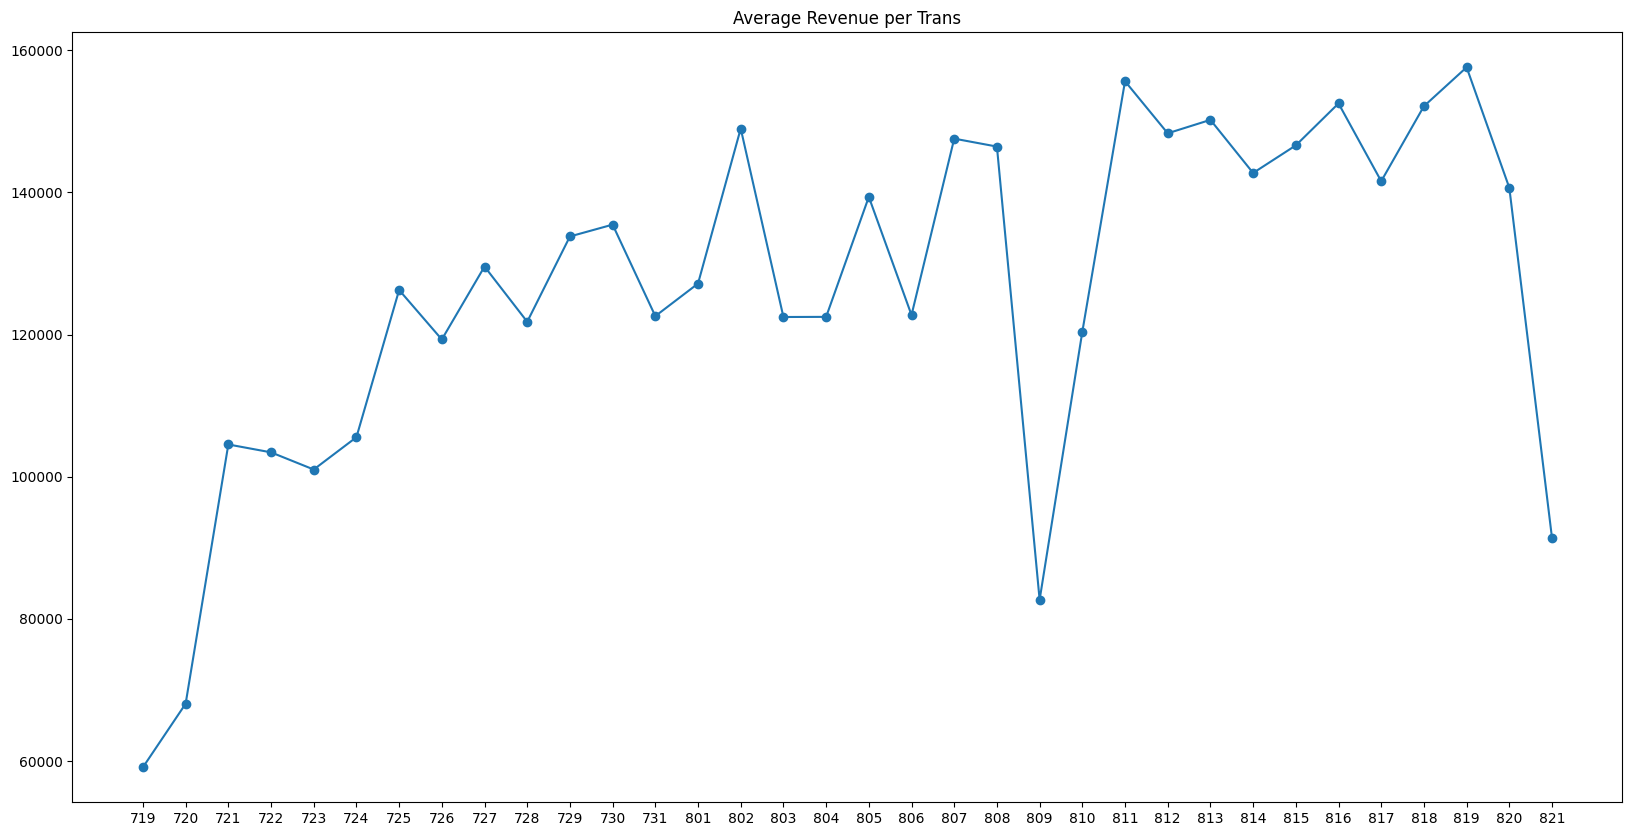

In [ ]:
avg_order_revenue = new_df.groupby(['DayKey'])['Revenue'].mean().reset_index()
avg_order_revenue['DayKey'] = avg_order_revenue['DayKey'].apply(str)

# Plot regression line
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('DayKey', 'Revenue', data=avg_order_revenue, linestyle='-', marker='o')
plt.title("Average Revenue per Trans")
plt.show()


##### Số lượng người chơi giao dịch lần đầu và người chơi có sự giao dịch lại trong tháng.

-  Tìm ngày giao dịch đầu tiên của mỗi tài khoản (AccountID) bằng cách nhóm dữ liệu theo "AccountID" và lấy .min() ngày giao dịch của họ. Sau đó tạo 1 DataFrame mới có tên "retail_new_df" chứa thông tin giao dịch lần đầu của mỗi tài khoản.
- Tạo một cột mới 'UserType' trong "retail_new_df" và gán giá trị 'New' cho tất cả các hàng.
- Cập nhật giá trị cho 'UserType' với điều kiện: Nếu 'DayKey' (ngày giao dịch) lớn hơn 'MinDayKey' (ngày giao dịch đầu tiên), thì cột 'UserType' được cập nhật thành 'Existing', ngược lại, nó sẽ là 'New.

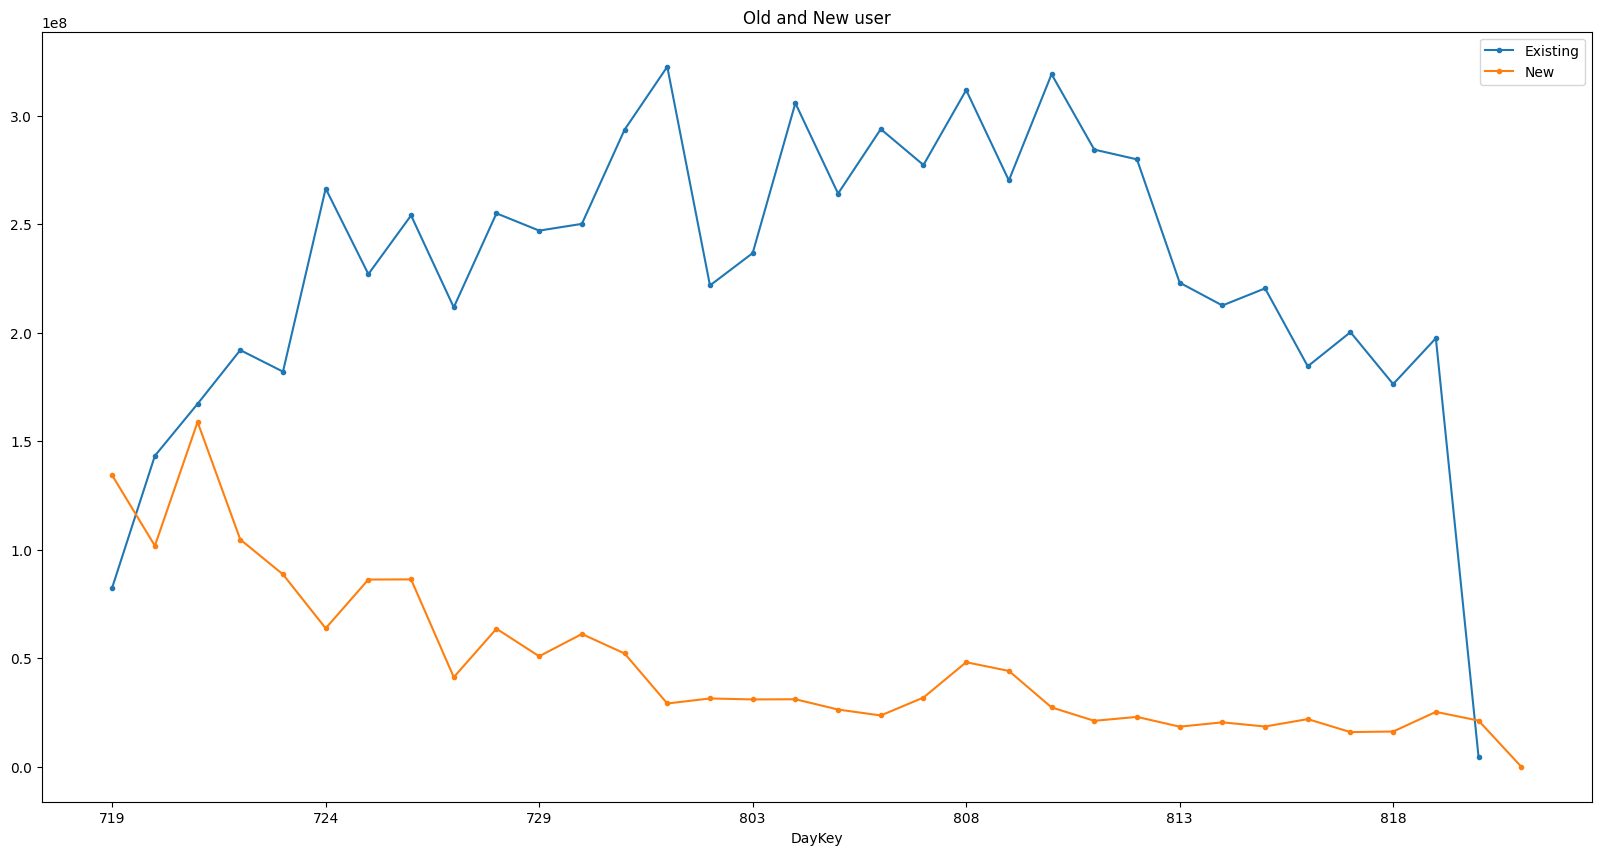

In [ ]:
new_df_min_date_purchase =new_df.groupby('AccountID').TopupTime.min().reset_index()
new_df_min_date_purchase.columns = ['AccountID','MinPurchaseDate']
new_df_min_date_purchase['MinDayKey'] = new_df_min_date_purchase['MinPurchaseDate'].map(lambda date: 100*date.month + date.day)

retail_new_df = pd.merge(new_df, new_df_min_date_purchase, on='AccountID')

#retail_new_df.head()

retail_new_df['UserType'] = 'New'
retail_new_df.loc[retail_new_df['DayKey']>retail_new_df['MinDayKey'],'UserType'] = 'Existing'

revenue_per_day = retail_new_df.groupby(['DayKey','UserType'])['Revenue'].sum().reset_index()
revenue_per_day['DayKey'] = revenue_per_day['DayKey'].apply(str)

plt.rcParams["figure.figsize"] = [20, 10]
fig, ax = plt.subplots()
for label, grp in revenue_per_day.groupby('UserType'):
    grp.plot(x='DayKey', y='Revenue', ax=ax, label=label, style='.-')
plt.title("Old and New user")
plt.show()

In [ ]:
user_type_counts = retail_new_df['UserType'].value_counts()
print(user_type_counts)
total_users = len(retail_new_df)
user_type_percentages = (user_type_counts / total_users) * 100
print(user_type_percentages)


Existing    46073
New         28451
Name: UserType, dtype: int64
Existing    61.823037
New         38.176963
Name: UserType, dtype: float64


##### Tỷ lệ người chơi quay lại giao dịch.

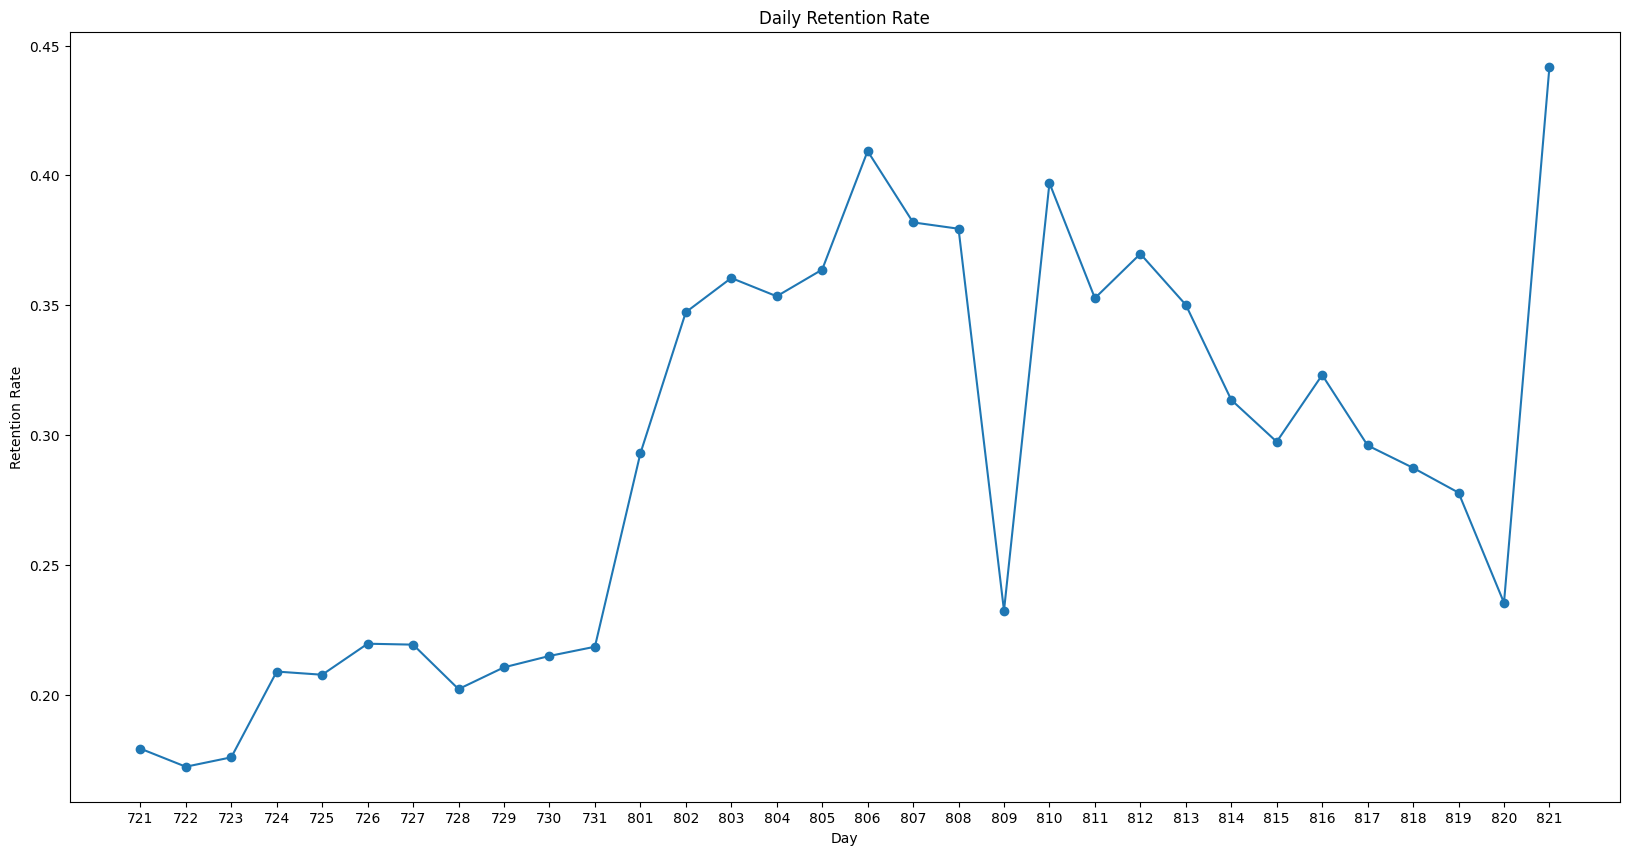

In [ ]:
df_user_purchase = new_df.groupby(['AccountID', 'DayKey'])['Revenue'].sum().reset_index()
df_retention = pd.crosstab(df_user_purchase['AccountID'], df_user_purchase['DayKey']).reset_index()
#print(df_retention.head(10))

days = df_retention.columns[2:]
retention_array = []
for i in range(len(days) - 1):
    retention_data = {}
    selected_day = days[i + 1]
    prev_day = days[i]
    retention_data['DayKey'] = int(selected_day)
    retention_data['TotalUserCount'] = df_retention[selected_day].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_day] > 0) & (df_retention[prev_day] > 0)][selected_day].sum()
    retention_array.append(retention_data)

df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount'] / df_retention['TotalUserCount']
df_retention['DayKey'] = df_retention['DayKey'].apply(str)

plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('DayKey', 'RetentionRate', data=df_retention, linestyle='-', marker='o')
plt.title("Daily Retention Rate")
plt.xlabel("Day")
plt.ylabel("Retention Rate")
plt.show()


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74524 entries, 0 to 145050
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransID                   74524 non-null  object        
 1   AccountID                 74524 non-null  object        
 2   AccountName               74524 non-null  object        
 3   PortalCode                74524 non-null  object        
 4   GameCode                  74524 non-null  object        
 5   GameServer                74524 non-null  object        
 6   NickName                  74524 non-null  object        
 7   PackageID                 74524 non-null  int64         
 8   GameAmount                74524 non-null  int64         
 9   TopupAmount               74524 non-null  int64         
 10  PaymentType               74524 non-null  int64         
 11  PaymentName               74524 non-null  object        
 12  TopupDesc        

### Phân khúc khách hàng

In [ ]:
from datetime import datetime

In [ ]:
new_df['TopupDate'] = pd.to_datetime(df['TopupDate'])

In [ ]:
current_date =new_df['TopupDate'].max() + pd.to_timedelta(1, 'D')
current_date

Timestamp('2023-08-22 00:00:00')

#### Cách 1: Ranking

##### Recency

In [ ]:
df_recency = new_df.groupby(by='AccountID',
                            as_index=False)['TopupDate'].max()
df_recency.columns = ['AccountID', 'LastTopupDate']
recent_date = df_recency['LastTopupDate'].max()
df_recency['Recency'] = df_recency['LastTopupDate'].apply(
    lambda x:(current_date - x).days)
df_recency.head(10)

,AccountID,LastTopupDate,Recency
0,1000001,2023-08-09,13
1,1000006,2023-08-09,13
2,1000008,2023-08-17,5
3,1000010,2023-08-17,5
4,1000011,2023-08-16,6
5,1000017,2023-07-19,34
6,1000021,2023-08-17,5
7,1000032,2023-08-17,5
8,1000080,2023-07-22,31
9,1001133,2023-07-21,32


In [ ]:
df_recency.describe()

,Recency
count,22319.00000
mean,19.72799
std,10.18348
min,1.00000
25%,11.00000
50%,21.00000
75%,29.00000
max,34.00000


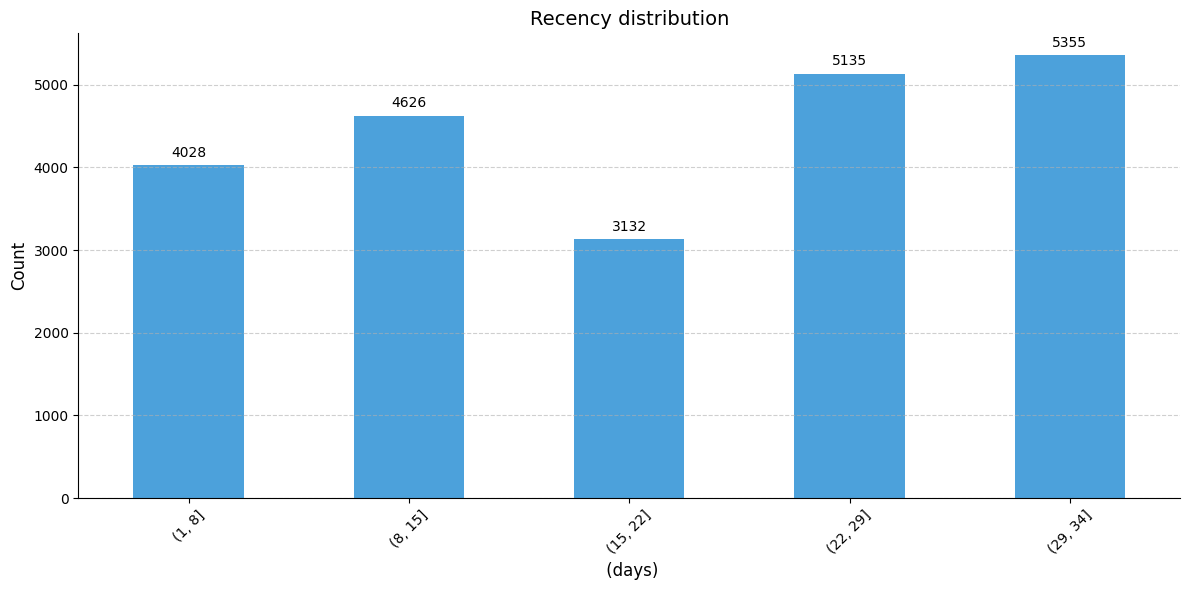

In [ ]:
data = df_recency
interval= [1,8,15,22,29,34]
df_recency['recency_interval'] = pd.cut(df_recency['Recency'], interval)

distribution = df_recency['recency_interval'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = distribution.plot(kind='bar', color='#007acc', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

plt.xlabel(' (days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Recency distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 100),
                ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

##### Frequency

In [ ]:
df_frequency = new_df.groupby('AccountID').TransID.count().reset_index()
df_frequency.columns = ['AccountID', 'Frequency']

df_frequency.head()

,AccountID,Frequency
0,1000001,12
1,1000006,2
2,1000008,15
3,1000010,9
4,1000011,20


In [ ]:
df_frequency.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,22319.0,3.339038,12.270964,1.0,1.0,1.0,2.0,1232.0


Nhận xét: Min, 25%, 50% của df_frequency đều là 1, 75% là 2 và max là 1232 \


In [ ]:
df_frequency[df_frequency['Frequency']>500]

,AccountID,Frequency
4035,3506598,1232


In [ ]:
len(df_frequency['Frequency'])

22319

In [ ]:
count_above_100 = len(df_frequency[df_frequency['Frequency'] <30 ])
print(count_above_100)


22002


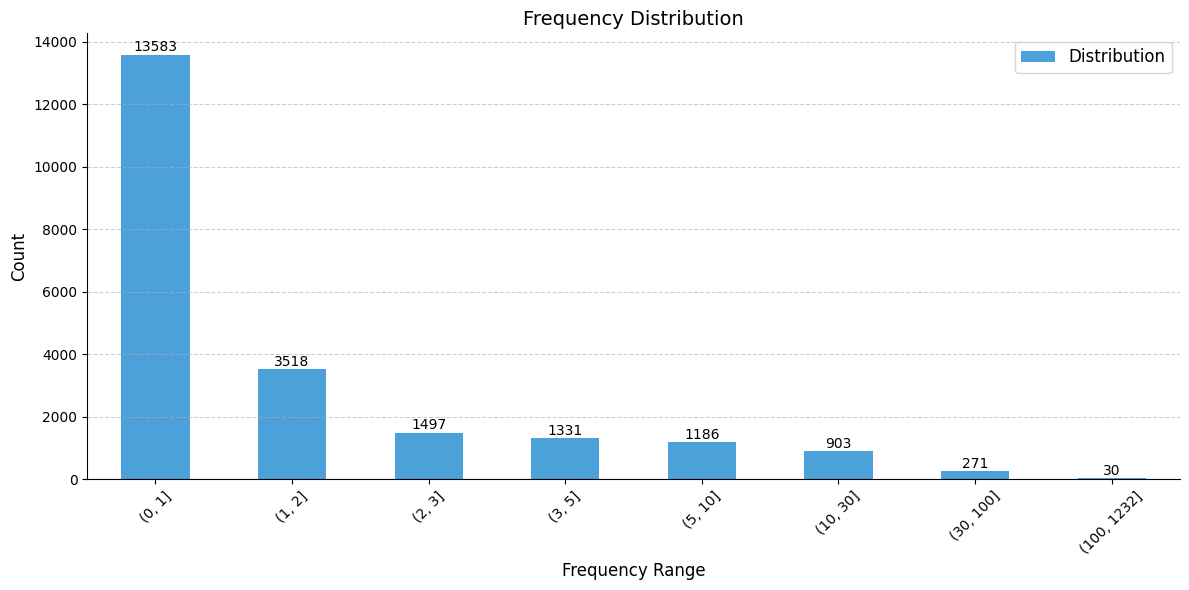

In [ ]:
data = df_frequency
interval = [0, 1, 2, 3, 5, 10, 30, 100, 1232]
df_frequency['frequency_interval'] = pd.cut(df_frequency['Frequency'], interval)

distribution = df_frequency['frequency_interval'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = distribution.plot(kind='bar', color='#007acc', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Frequency Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency Distribution', fontsize=14)
ax.legend(['Distribution'], fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 100),
                ha='center', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Tính Monetary

In [ ]:
new_df['Total'] = new_df['TopupAmount']*500
df_monetary = new_df.groupby(by='AccountID', as_index=False)['Total'].sum()
df_monetary.columns = ['AccountID', 'Monetary']
df_monetary.head()

,AccountID,Monetary
0,1000001,1596000
1,1000006,45000
2,1000008,1757000
3,1000010,494500
4,1000011,904000


In [ ]:
df_monetary.describe().T

,count,mean,std,min,25%,50%,75%,max
Monetary,22319.0,412123.863076,3.394454e+06,20000.0,25000.0,25000.0,75000.0,265271500.0


In [ ]:
df_monetary[df_monetary['Monetary']> 200000000]

,AccountID,Monetary
7985,3541305,265271500


In [ ]:
len(df_monetary['Monetary'])

22319

In [ ]:
count_above_100 = len(df_monetary[df_monetary['Monetary'] <500000 ])
print(count_above_100)


19901


In [ ]:
count_above_100 = len(df_monetary[df_monetary['Monetary'] > 200000000 ])
print(count_above_100)


1


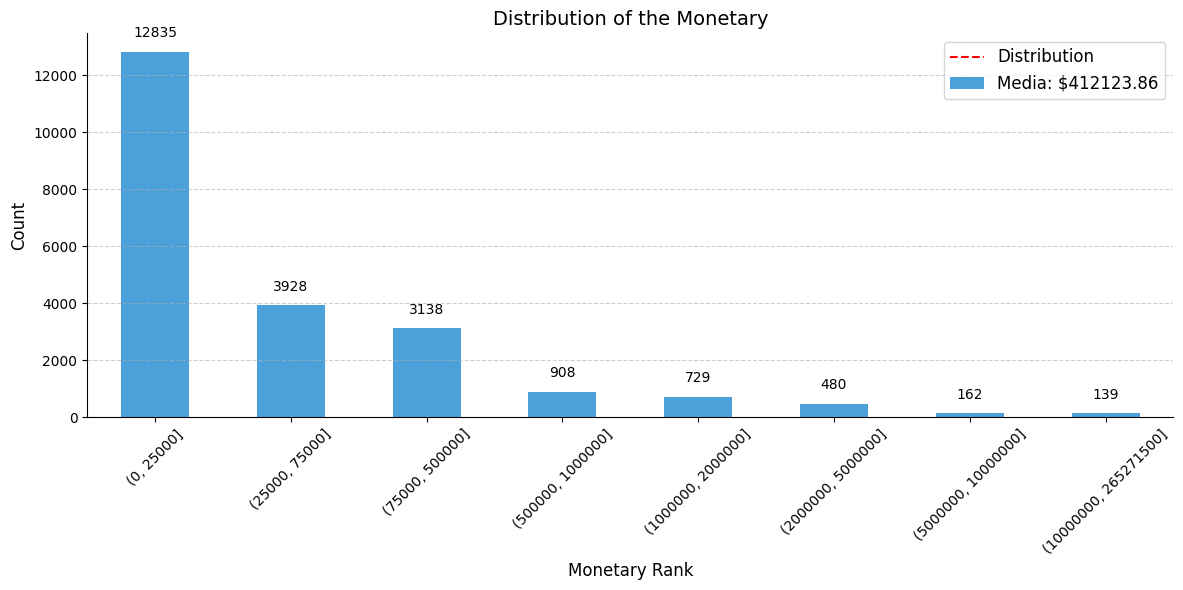

In [ ]:
data = df_monetary
interval = [0, 25000, 75000, 500000,  1000000, 2000000,  5000000,  10000000,  265271500]
df_monetary['monetary_interval'] = pd.cut(df_monetary['Monetary'], interval)

distribution= df_monetary['monetary_interval'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = distribution.plot(kind='bar', color='#007acc', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Monetary Rank', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of the Monetary', fontsize=14)
ax.legend(['Distribution'], fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 500),
                ha='center', fontsize=10, color='black')

media_monetary = df_monetary['Monetary'].mean()
plt.axvline(x=interval.index(interval[-1]), color='red', linestyle='--', label=f'Media: ${media_monetary:.2f}')

ax.legend(['Distribution', f'Media: ${media_monetary:.2f}'], fontsize=12)

plt.tight_layout()
plt.show()

#####RFM Score

In [ ]:
rf_df = df_recency.merge(df_frequency, on='AccountID')
rfm1_df = rf_df.merge(df_monetary, on='AccountID')
rfm1_df.head()

,AccountID,LastTopupDate,Recency,recency_interval,Frequency,frequency_interval,Monetary,monetary_interval
0,1000001,2023-08-09,13,"(8, 15]",12,"(10, 30]",1596000,"(1000000, 2000000]"
1,1000006,2023-08-09,13,"(8, 15]",2,"(1, 2]",45000,"(25000, 75000]"
2,1000008,2023-08-17,5,"(1, 8]",15,"(10, 30]",1757000,"(1000000, 2000000]"
3,1000010,2023-08-17,5,"(1, 8]",9,"(5, 10]",494500,"(75000, 500000]"
4,1000011,2023-08-16,6,"(1, 8]",20,"(10, 30]",904000,"(500000, 1000000]"


In [ ]:
rfm1_df['R_rank'] = rfm1_df['Recency'].rank(ascending=False)
rfm1_df['F_rank'] = rfm1_df['Frequency'].rank(ascending=True)
rfm1_df['M_rank'] = rfm1_df['Monetary'].rank(ascending=True)

rfm1_df['R_rank_norm'] = (rfm1_df['R_rank']/rfm1_df['R_rank'].max())*100
rfm1_df['F_rank_norm'] = (rfm1_df['F_rank']/rfm1_df['F_rank'].max())*100
rfm1_df['M_rank_norm'] = (rfm1_df['F_rank']/rfm1_df['M_rank'].max())*100

rfm1_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm1_df.head()

,AccountID,LastTopupDate,Recency,recency_interval,Frequency,frequency_interval,Monetary,monetary_interval,R_rank_norm,F_rank_norm,M_rank_norm
0,1000001,2023-08-09,13,"(8, 15]",12,"(10, 30]",1596000,"(1000000, 2000000]",67.775137,95.351494,95.351494
1,1000006,2023-08-09,13,"(8, 15]",2,"(1, 2]",45000,"(25000, 75000]",67.775137,68.741879,68.741879
2,1000008,2023-08-17,5,"(1, 8]",15,"(10, 30]",1757000,"(1000000, 2000000]",89.283792,96.471616,96.471616
3,1000010,2023-08-17,5,"(1, 8]",9,"(5, 10]",494500,"(75000, 500000]",89.283792,93.660110,93.660110
4,1000011,2023-08-16,6,"(1, 8]",20,"(10, 30]",904000,"(500000, 1000000]",87.137860,97.580537,97.580537


In [ ]:
#Calculating RFM score
rfm1_df['RFM_Score'] = (1/3)* rfm1_df['R_rank_norm']+ (1/3) * rfm1_df['F_rank_norm']+ (1/3)* rfm1_df['M_rank_norm']
rfm1_df['RFM_Score'] *= 0.05
rfm1_df = rfm1_df.round(2)
rfm1_df[['AccountID', 'RFM_Score']].head(7)

,AccountID,RFM_Score
0,1000001,4.31
1,1000006,3.42
2,1000008,4.70
3,1000010,4.61
4,1000011,4.70
5,1000017,1.05
6,1000021,4.15


 rfm score > 4.5 : Top Customer \
 4.5 > rfm score > 4 : High Value Customer \
 4 > rfm score > 3 : Medium value customer \
 3 > rfm score > 1.6 : Low-value customer \
 rfm score < 1.6 : Lost Customer

In [ ]:
rfm1_df["Customer_segment"] = np.where(rfm1_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm1_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm1_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm1_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm1_df[['AccountID', 'RFM_Score', 'Customer_segment']].head(20)

,AccountID,RFM_Score,Customer_segment
0,1000001,4.31,High value Customer
1,1000006,3.42,Medium Value Customer
2,1000008,4.70,Top Customers
3,1000010,4.61,Top Customers
4,1000011,4.70,Top Customers
5,1000017,1.05,Lost Customers
6,1000021,4.15,High value Customer
7,1000032,4.79,Top Customers
8,1000080,1.30,Lost Customers
9,1001133,2.87,Low Value Customers


In [ ]:
# plt.pie(rfm1_df.Customer_segment.value_counts(),
#         labels=rfm1_df.Customer_segment.value_counts().index,
#         autopct='%.0f%%')
# plt.show()

In [ ]:
#rfm_df['R Score'] = rfm_df['R Score'].astype('int64')
#rfm_df.dtypes

In [ ]:
rfm1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 22318
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AccountID           22319 non-null  object        
 1   LastTopupDate       22319 non-null  datetime64[ns]
 2   Recency             22319 non-null  int64         
 3   recency_interval    22276 non-null  category      
 4   Frequency           22319 non-null  int64         
 5   frequency_interval  22319 non-null  category      
 6   Monetary            22319 non-null  int64         
 7   monetary_interval   22319 non-null  category      
 8   R_rank_norm         22319 non-null  float64       
 9   F_rank_norm         22319 non-null  float64       
 10  M_rank_norm         22319 non-null  float64       
 11  RFM_Score           22319 non-null  float64       
 12  Customer_segment    22319 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(4),

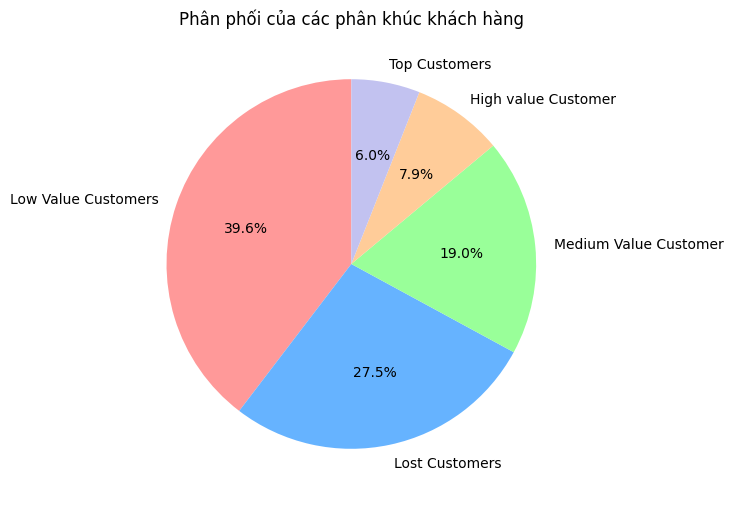

In [ ]:
segment_counts = rfm1_df['Customer_segment'].value_counts()
segments = segment_counts.index
count_values = segment_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366']
percentages = [f'{val / sum(count_values) * 100:.1f}%' for val in count_values]

plt.figure(figsize=(8, 6))
plt.pie(count_values, labels=segments, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Phân phối của các phân khúc khách hàng')

plt.show()

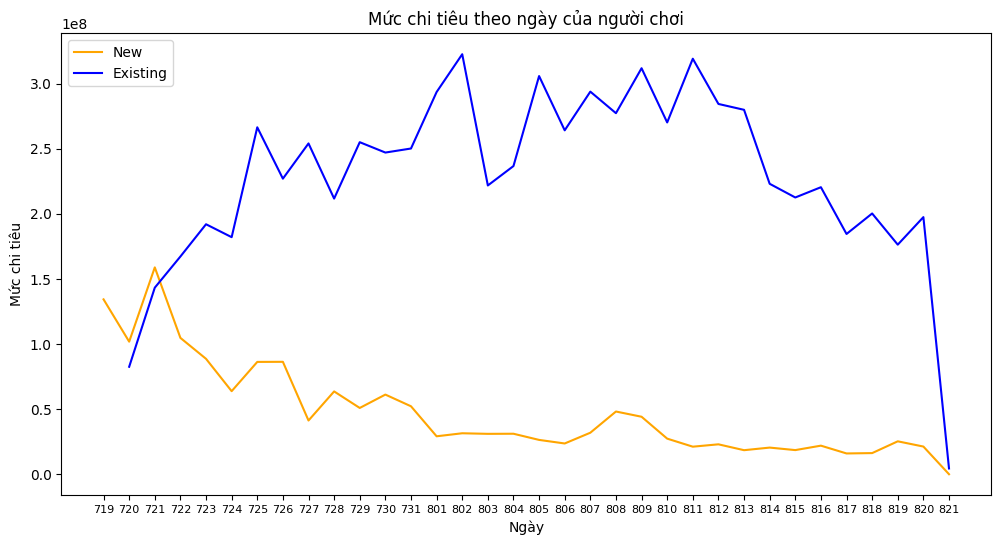

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
colors = ['orange','blue',]

for i, group_name in enumerate(revenue_per_day['UserType'].unique()):
    group_data = revenue_per_day[revenue_per_day['UserType'] == group_name]
    plt.plot(group_data['DayKey'], group_data['Revenue'], label=group_name, color=colors[i])

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title("Mức chi tiêu theo ngày của người chơi")
plt.xlabel("Ngày")
plt.ylabel("Mức chi tiêu")
plt.legend(loc='upper left')
plt.xticks(fontsize=8)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
colors = ['orange', 'blue']  # Màu cam và xanh nước biển

for i, group_name in enumerate(revenue_per_day['UserType'].unique()):
    group_data = revenue_per_day[revenue_per_day['UserType'] == group_name]
    plt.plot(group_data['DayKey'], group_data['Revenue'], label=group_name, color=colors[i])

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title("Mức chi tiêu theo ngày cho từng nhóm khách hàng")
plt.xlabel("Ngày")
plt.ylabel("Mức chi tiêu")
plt.legend(loc='upper left')

# Thêm chú thích từng ngày bên dưới
for day, date_label in zip(group_data['DayKey'], group_data['DayKey']):
    plt.text(day, -5, date_label, rotation=90, verticalalignment='bottom', horizontalalignment='center')

plt.show()


In [ ]:
rfm1_df.drop(columns=['M_rank_norm', 'F_rank_norm', 'R_rank_norm'], inplace=True)
rfm1_df

,AccountID,LastTopupDate,Recency,recency_interval,Frequency,frequency_interval,Monetary,monetary_interval,RFM_Score,Customer_segment
0,1000001,2023-08-09,13,"(8, 15]",12,"(10, 30]",1596000,"(1000000, 2000000]",4.31,High value Customer
1,1000006,2023-08-09,13,"(8, 15]",2,"(1, 2]",45000,"(25000, 75000]",3.42,Medium Value Customer
2,1000008,2023-08-17,5,"(1, 8]",15,"(10, 30]",1757000,"(1000000, 2000000]",4.70,Top Customers
3,1000010,2023-08-17,5,"(1, 8]",9,"(5, 10]",494500,"(75000, 500000]",4.61,Top Customers
4,1000011,2023-08-16,6,"(1, 8]",20,"(10, 30]",904000,"(500000, 1000000]",4.70,Top Customers
...,...,...,...,...,...,...,...,...,...,...
22314,3749377,2023-08-20,2,"(1, 8]",1,"(0, 1]",25000,"(0, 25000]",2.64,Low Value Customers
22315,3749403,2023-08-20,2,"(1, 8]",1,"(0, 1]",25000,"(0, 25000]",2.64,Low Value Customers
22316,3749464,2023-08-20,2,"(1, 8]",1,"(0, 1]",25000,"(0, 25000]",2.64,Low Value Customers
22317,3749489,2023-08-20,2,"(1, 8]",1,"(0, 1]",25000,"(0, 25000]",2.64,Low Value Customers


In [ ]:
newrfm1_df = rfm1_df[['AccountID', 'Customer_segment']]
newrfm1_df.head()


,AccountID,Customer_segment
0,1000001,High value Customer
1,1000006,Medium Value Customer
2,1000008,Top Customers
3,1000010,Top Customers
4,1000011,Top Customers


In [ ]:
#new_df.info()

In [ ]:
newrfm1_df.head()

,AccountID,Customer_segment
0,1000001,High value Customer
1,1000006,Medium Value Customer
2,1000008,Top Customers
3,1000010,Top Customers
4,1000011,Top Customers


In [ ]:
# min_timestamp = new_df['TopupDate'].min()
# print("Giá trị thời gian tối thiểu:", min_timestamp)
# max_timestamp = new_df['TopupDate'].max()
# print("Giá trị thời gian tối đa:", max_timestamp)

In [ ]:
newrfm1_df.to_csv('/content/gdrive/MyDrive/newrfm1_df.csv', index=False)
newrfm1_df = pd.read_csv('/content/gdrive/MyDrive/newrfm1_df.csv')
newrfm1_df.head(10)

,AccountID,Customer_segment
0,1000001,High value Customer
1,1000006,Medium Value Customer
2,1000008,Top Customers
3,1000010,Top Customers
4,1000011,Top Customers
5,1000017,Lost Customers
6,1000021,High value Customer
7,1000032,Top Customers
8,1000080,Lost Customers
9,1001133,Low Value Customers


In [ ]:
rfm1_df.head()

,AccountID,LastTopupDate,Recency,recency_interval,Frequency,frequency_interval,Monetary,monetary_interval,RFM_Score,Customer_segment
0,1000001,2023-08-09,13,"(8, 15]",12,"(10, 30]",1596000,"(1000000, 2000000]",4.31,High value Customer
1,1000006,2023-08-09,13,"(8, 15]",2,"(1, 2]",45000,"(25000, 75000]",3.42,Medium Value Customer
2,1000008,2023-08-17,5,"(1, 8]",15,"(10, 30]",1757000,"(1000000, 2000000]",4.70,Top Customers
3,1000010,2023-08-17,5,"(1, 8]",9,"(5, 10]",494500,"(75000, 500000]",4.61,Top Customers
4,1000011,2023-08-16,6,"(1, 8]",20,"(10, 30]",904000,"(500000, 1000000]",4.70,Top Customers


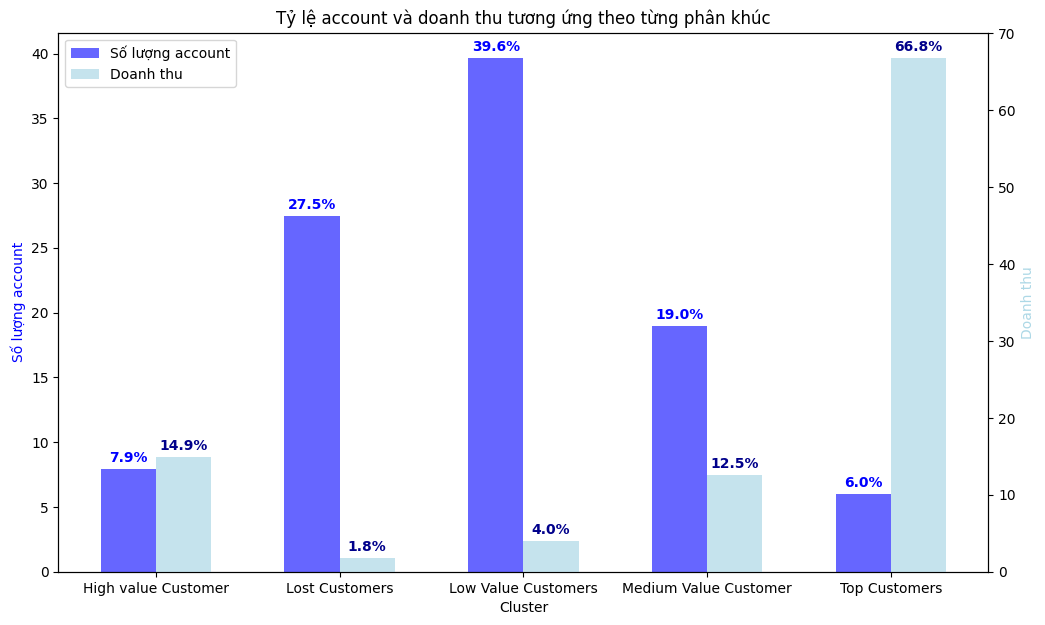

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cluster_counts = rfm1_df['Customer_segment'].value_counts()
total_customers = len(rfm1_df)
cluster_customer_ratio = (cluster_counts / total_customers) * 100
#print(cluster_customer_ratio)

num_clusters = len(cluster_counts)

cluster_revenue = rfm1_df.groupby('Customer_segment')['Monetary'].sum()
#print(cluster_revenue)
total_revenue = rfm1_df['Monetary'].sum()
#print(total_revenue)
cluster_total_revenue = (cluster_revenue / total_revenue) *100
#print(cluster_total_revenue)

cluster_counts = cluster_counts.sort_index()
cluster_customer_ratio = cluster_customer_ratio.sort_index()
cluster_total_revenue = cluster_total_revenue.sort_index()
x = np.arange(num_clusters)

width = 0.3
fig, ax1 = plt.subplots(figsize=(12, 7))

bars1 = ax1.bar(x - width / 2, cluster_customer_ratio, width, label='Số lượng account', alpha=0.6, color='blue')

for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='blue')

ax1.set_xlabel('Cluster')
ax1.set_ylabel('Số lượng account', color='blue')
ax2 = ax1.twinx()

bars2 = ax2.bar(x + width / 2, cluster_total_revenue, width, label='Doanh thu', color='lightblue', alpha=0.7)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='darkblue')

ax2.set_ylabel('Doanh thu', color='lightblue')

ax1.set_xticks(x)
ax1.set_xticklabels(cluster_counts.index)

plt.title('Tỷ lệ account và doanh thu tương ứng theo từng phân khúc')
#plt.legend(loc='upper left', labels=['Doanh thu', 'Số lượng account'])
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
#lt.legend(loc='upper right', labels=['Số lượng account', 'Số lượng account'])
plt.show()

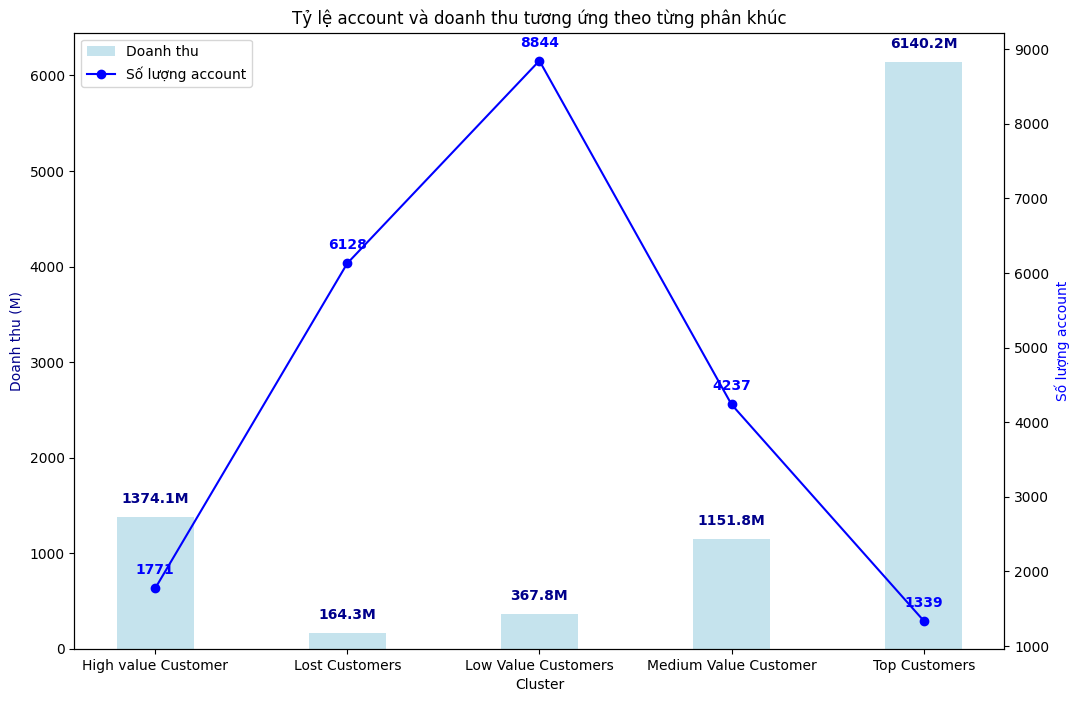

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cluster_counts = rfm1_df['Customer_segment'].value_counts()
#print(cluster_counts)

num_clusters = len(cluster_counts)
cluster_revenue = rfm1_df.groupby('Customer_segment')['Monetary'].sum() / 1e6
#print(cluster_revenue)


cluster_counts = cluster_counts.sort_index()
#cluster_customer_ratio = cluster_customer_ratio.sort_index()
cluster_revenue = cluster_revenue.sort_index()
x = np.arange(num_clusters)

x = np.arange(num_clusters)
fig, ax1 = plt.subplots(figsize=(12, 8))

bars1 = ax1.bar(x, cluster_revenue, width=0.4, label='Doanh thu', color='lightblue', alpha=0.7)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}M',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 8),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='darkblue')

ax1.set_xlabel('Cluster')
ax1.set_ylabel('Doanh thu (M)', color='darkblue')
ax2 = ax1.twinx()

line2 = ax2.plot(x, cluster_counts, marker='o', linestyle='-', color='blue', label='Số lượng account')

for i, value in enumerate(cluster_counts):
    ax2.annotate(f'{value}',
                 xy=(x[i], value),
                 xytext=(0, 8),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='blue')

ax2.set_ylabel('Số lượng account', color='blue')

ax1.set_xticks(x)
ax1.set_xticklabels(cluster_counts.index)

plt.title('Tỷ lệ account và doanh thu tương ứng theo từng phân khúc')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

#### Cách 2: Kmeans

##### Tính R, F, M value

In [ ]:
current_date =new_df['TopupDate'].max() + pd.to_timedelta(1, 'D')
current_date

Timestamp('2023-08-22 00:00:00')

In [ ]:
#current_date = datetime.now()

new_df['Recency_Value'] = (current_date - new_df.groupby('AccountID')['TopupDate'].transform('max')).dt.days
new_df['Frequency_Value'] = new_df.groupby('AccountID')['TransID'].transform('count')
new_df['Monetary_Value'] = new_df.groupby('AccountID')['TopupAmount'].transform('sum') * 500

rfm_df = new_df[['AccountID', 'Recency_Value', 'Frequency_Value', 'Monetary_Value']].drop_duplicates()
rfm_df.head(5)


,AccountID,Recency_Value,Frequency_Value,Monetary_Value
0,3650206,2,88,20119000
1,3604503,4,118,29665000
2,3576917,2,51,13360000
3,3732234,4,13,2217500
4,3596920,3,16,2026500


In [ ]:
df['TopupDate'] = pd.to_datetime(df['TopupDate'])

In [ ]:
df['TopupDate'].describe

<bound method NDFrame.describe of 0        2023-08-17
1        2023-08-17
2        2023-08-17
3        2023-08-17
4        2023-08-17
            ...    
145046   2023-08-17
145047   2023-08-17
145048   2023-08-17
145049   2023-08-17
145050   2023-08-17
Name: TopupDate, Length: 145051, dtype: datetime64[ns]>

In [ ]:
current_date = current_date.to_datetime64()


In [ ]:

from datetime import datetime

# Tạo một Timestamp từ ngày hiện tại
current_date = pd.Timestamp(datetime.now())

new_df['Recency_Value'] = (current_date - new_df.groupby('AccountID')['TopupDate'].transform('max')).dt.days
new_df['Frequency_Value'] = new_df.groupby('AccountID')['TransID'].transform('count')
new_df['Monetary_Value'] = new_df.groupby('AccountID')['TopupAmount'].transform('sum') * 500

rfm_df = new_df[['AccountID', 'Recency_Value', 'Frequency_Value', 'Monetary_Value']].drop_duplicates()
rfm_df.head(5)


,AccountID,Recency_Value,Frequency_Value,Monetary_Value
0,3650206,59,88,20119000
1,3604503,61,118,29665000
2,3576917,59,51,13360000
3,3732234,61,13,2217500
4,3596920,60,16,2026500


In [ ]:
account_id_to_find = '1000006'

result = rfm_df.loc[rfm_df['AccountID'] == account_id_to_find]
print(result)

       AccountID  Recency_Value  Frequency_Value  Monetary_Value
122274   1000006             70                2           45000


In [ ]:
import pandas as pd
account_id_to_find = '1000010'

result = rfm_df.loc[rfm_df['AccountID'] == account_id_to_find]
print(result)

    AccountID  Recency_Value  Frequency_Value  Monetary_Value
141   1000010             62                9          494500


In [ ]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency_Value,22319.0,76.727990,1.018348e+01,58.0,68.0,78.0,86.0,91.0
Frequency_Value,22319.0,3.339038,1.227096e+01,1.0,1.0,1.0,2.0,1232.0
Monetary_Value,22319.0,412123.863076,3.394454e+06,20000.0,25000.0,25000.0,75000.0,265271500.0


In [ ]:
# r = rfm_df['Recency_Value']
# r_score = rfm_df['R Score']

# plt.scatter(r, r_score, s=100, c=r_score, edgecolor='black', linewidth=1, alpha=0.1)

# cbar = plt.colorbar()
# cbar.set_label('Recency Score')

# plt.title('Recency Score Distribution')
# plt.xlabel('Recency')
# plt.ylabel('Recency Score')


# plt.show()

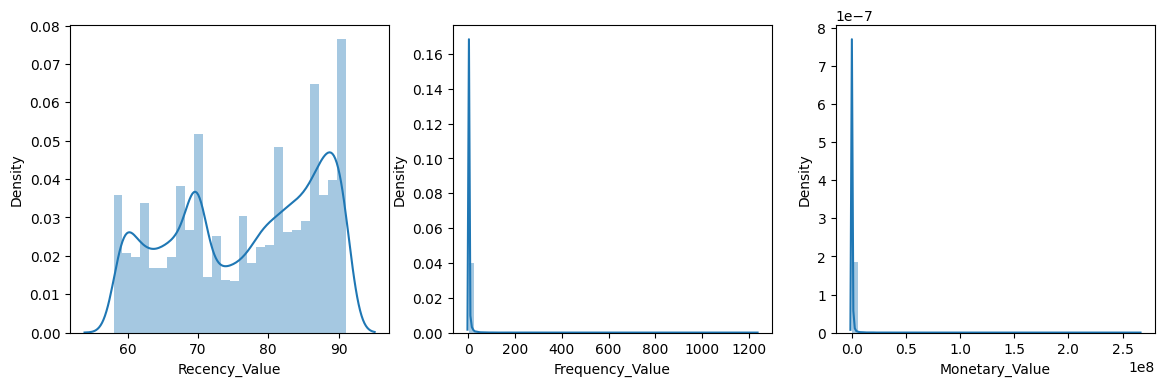

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))
sns.distplot(rfm_df['Recency_Value'], ax = ax[0])
sns.distplot(rfm_df['Frequency_Value'], ax = ax[1])
sns.distplot(rfm_df['Monetary_Value'], ax = ax[2])
plt.show()


Transform

In [ ]:

from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_df[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_df[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_df[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_df[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(rfm_df[x].skew().round(2))
    print(np.log(rfm_df[x]).skew().round(2))
    print(np.sqrt(rfm_df[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm_df[x])[0]).skew().round(2))

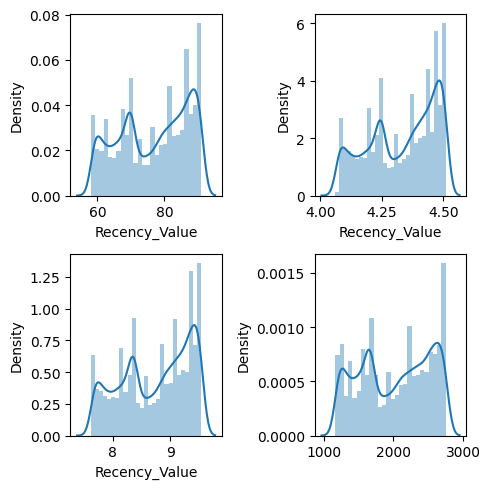

-0.24
-0.37
-0.3
-0.12


In [ ]:
analyze_skewness('Recency_Value')

-0.13 gần 0 nhất. => Chọn boxcox

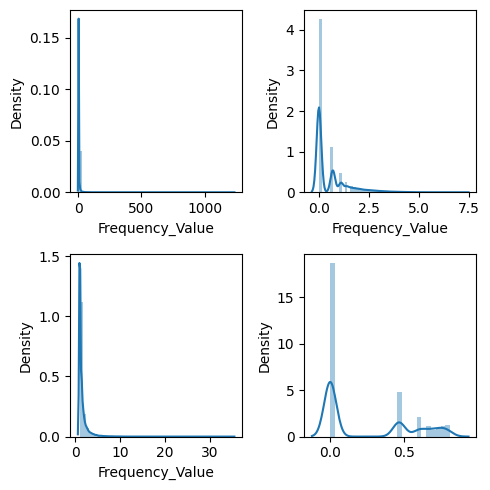

51.37
1.89
5.68
0.65


In [ ]:
analyze_skewness('Frequency_Value')

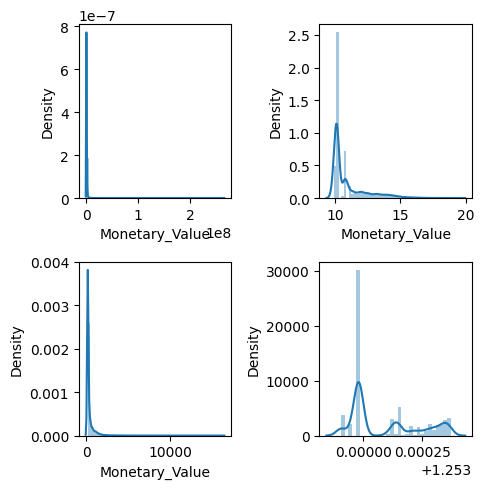

39.63
1.82
7.79
0.66


In [ ]:
analyze_skewness('Monetary_Value')

In [ ]:
rfm_df.head()

,AccountID,Recency_Value,Frequency_Value,Monetary_Value
0,3650206,59,88,20119000
1,3604503,61,118,29665000
2,3576917,59,51,13360000
3,3732234,61,13,2217500
4,3596920,60,16,2026500


In [ ]:
rfm_t_df = pd.DataFrame()
rfm_t_df['Recency_Value'] = stats.boxcox(rfm_df['Recency_Value'])[0]
rfm_t_df['Frequency_Value'] = stats.boxcox(rfm_df['Frequency_Value'])[0]
#rfm_df_t['Monetary_Value'] = rfm_df['Monetary_Value']
rfm_t_df['Monetary_Value'] = stats.boxcox(rfm_df['Monetary_Value'])[0]
rfm_t_df.head(5)


,Recency_Value,Frequency_Value,Monetary_Value
0,1208.118631,0.809822,1.253368
1,1287.050472,0.810822,1.253368
2,1208.118631,0.806665,1.253367
3,1287.050472,0.778434,1.253359
4,1247.289315,0.786252,1.253358


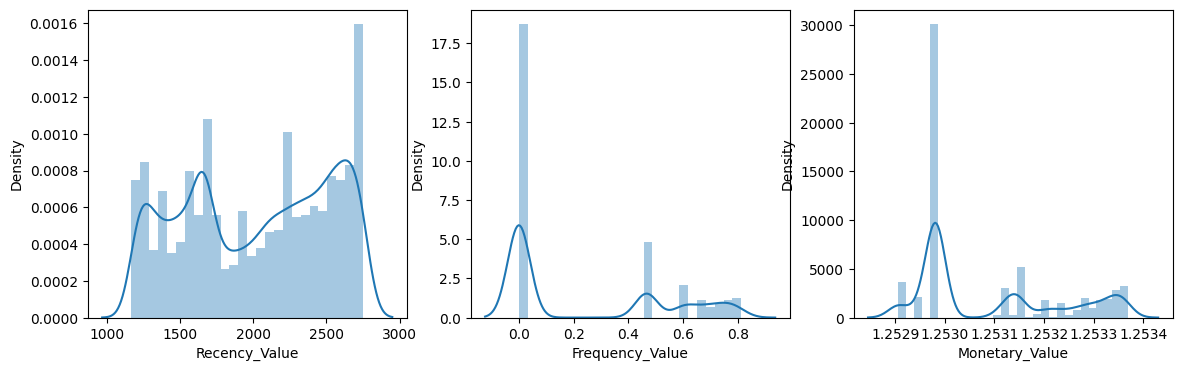

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))
sns.distplot(rfm_t_df['Recency_Value'], ax = ax[0])
sns.distplot(rfm_t_df['Frequency_Value'], ax = ax[1])
sns.distplot(rfm_t_df['Monetary_Value'], ax = ax[2])
plt.show()


In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_t_df)

rfm_t_df = scaler.transform(rfm_t_df)
rfm_t_df

array([[-1.64042325,  1.87870703,  1.87841589],
       [-1.48079356,  1.88198373,  1.88175717],
       [-1.64042325,  1.86836421,  1.873571  ],
       ...,
       [-1.3991895 , -0.77469216, -0.71905204],
       [-1.3991895 , -0.77469216, -0.94793977],
       [-1.3991895 , -0.77469216, -0.71905204]])

In [ ]:
X_df=pd.DataFrame(rfm_t_df,columns=['Recency_Value', 'Frequency_Value', 'Monetary_Value'])
X_df.head()

,Recency_Value,Frequency_Value,Monetary_Value
0,-1.640423,1.878707,1.878416
1,-1.480794,1.881984,1.881757
2,-1.640423,1.868364,1.873571
3,-1.480794,1.775864,1.818097
4,-1.561205,1.801479,1.812668


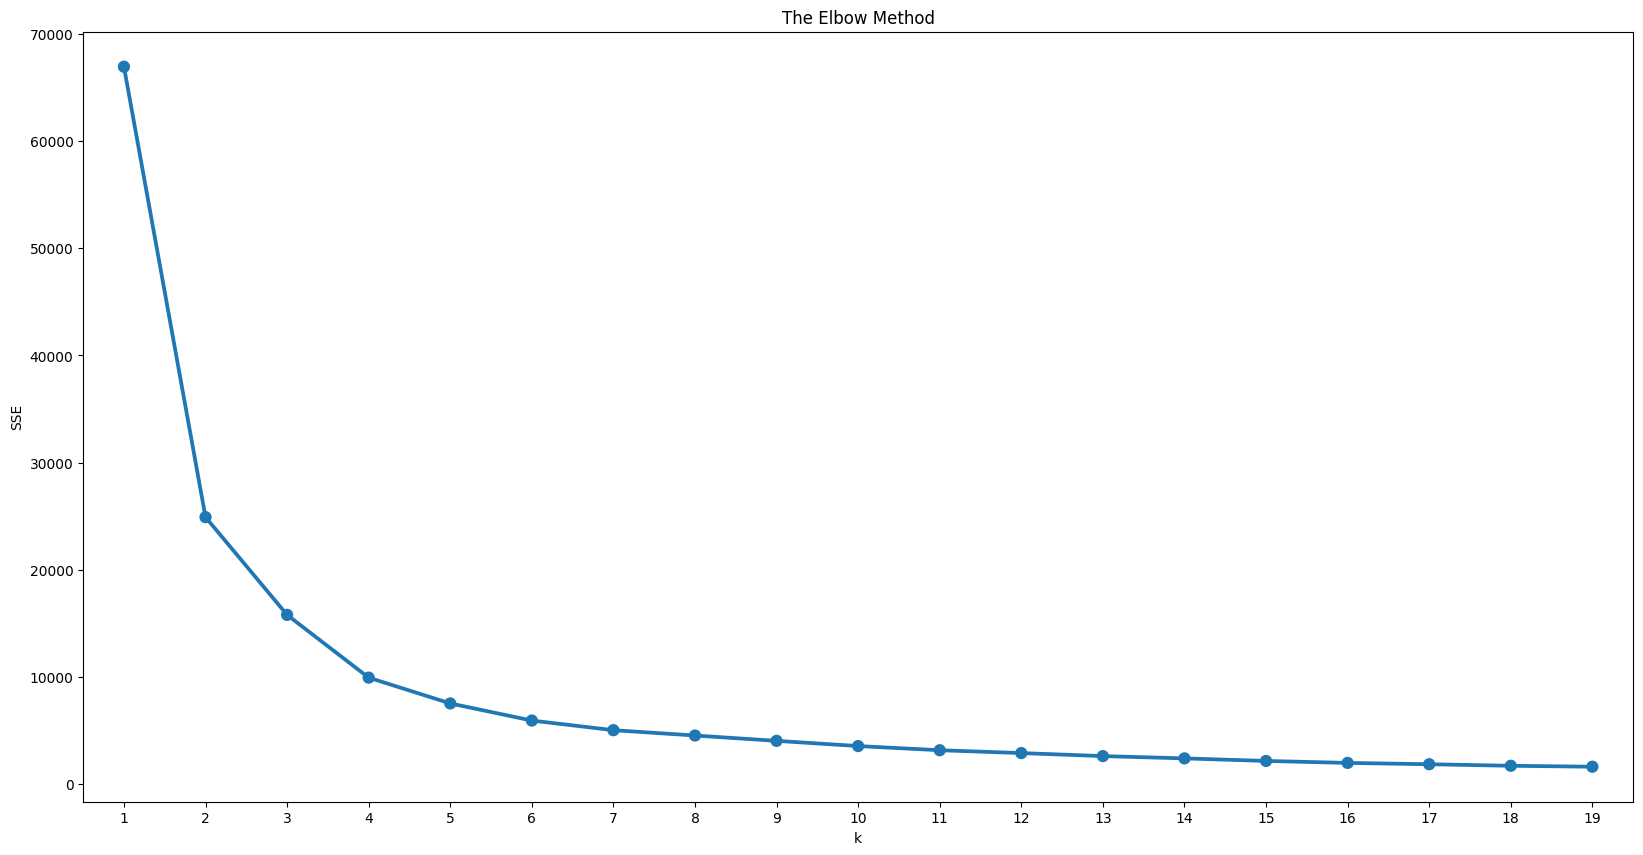

In [ ]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_df)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

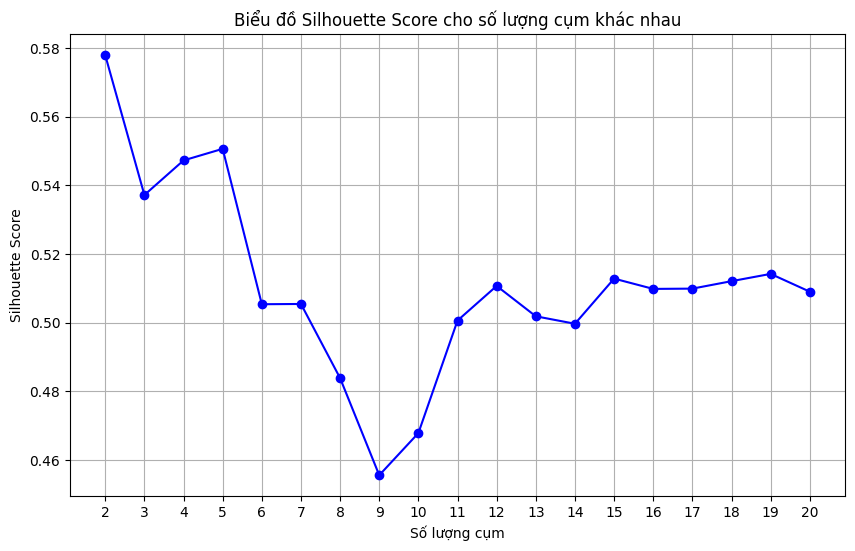

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

silhouette_scores = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_df)
    silhouette_avg = silhouette_score(X_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Vẽ biểu đồ Silhouette Score theo số lượng cụm
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Số lượng cụm')
plt.ylabel('Silhouette Score')
plt.title('Biểu đồ Silhouette Score cho số lượng cụm khác nhau')
plt.xticks(np.arange(2, 21, 1))
plt.grid(True)
plt.show()


In [ ]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X_df)

KMeans(n_clusters=5, random_state=42)

In [ ]:
X_df['Cluster']=model.labels_
X_df.head(10)

,Recency_Value,Frequency_Value,Monetary_Value,Cluster
0,-1.640423,1.878707,1.878416,2
1,-1.480794,1.881984,1.881757,2
2,-1.640423,1.868364,1.873571,2
3,-1.480794,1.775864,1.818097,2
4,-1.561205,1.801479,1.812668,2
5,-1.399189,1.405196,1.753633,2
6,-1.399189,-0.774692,-0.719052,0
7,-1.718445,1.881741,1.881095,2
8,-1.399189,1.405196,1.529601,2
9,-1.480794,1.764106,1.859602,2


In [ ]:
rfm_df['Cluster'] = model.labels_
rfm_df.head(10)

,AccountID,Recency_Value,Frequency_Value,Monetary_Value,Cluster
0,3650206,59,88,20119000,2
1,3604503,61,118,29665000,2
2,3576917,59,51,13360000,2
3,3732234,61,13,2217500,2
4,3596920,60,16,2026500,2
6,3615671,62,4,1002000,2
8,3727973,62,1,25000,0
9,3572892,58,115,27190500,2
12,3727296,62,4,298000,2
13,3709921,61,12,6380000,2


In [ ]:
X_df.groupby('Cluster').agg(
    {
        'Recency_Value':'mean',
        'Frequency_Value':'mean',
        'Monetary_Value':'mean'
    }
).round(2)

,Recency_Value,Frequency_Value,Monetary_Value
Cluster,,,
0,-0.83,-0.77,-0.69
1,0.88,-0.77,-0.76
2,-1.13,1.57,1.61
3,-0.83,0.81,0.57
4,0.76,1.01,0.99


In [ ]:
rfm_df.groupby('Cluster').agg(
    {
        'Recency_Value':'mean',
        'Frequency_Value':'mean',
        'Monetary_Value':'mean'
    }
).round(2)

,Recency_Value,Frequency_Value,Monetary_Value
Cluster,,,
0,68.37,1.00,25728.70
1,85.63,1.00,25024.56
2,65.07,12.86,2141914.43
3,68.43,2.18,71770.51
4,84.57,3.48,371426.87


In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# recency_data = rfm_df['Recency_Value']
# frequency_data = rfm_df['Frequency_Value']
# monetary_data = rfm_df['Monetary_Value']

# cluster_labels = rfm_df['Cluster']

# # Tạo biểu đồ 3D
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# colors = ['red', 'green', 'blue', 'purple']

# for cluster_id, color in zip(rfm_df['Cluster'].unique(), colors):
#     cluster_data = rfm_df[rfm_df['Cluster'] == cluster_id]
#     ax.scatter(cluster_data['Recency_Value'], cluster_data['Frequency_Value'], cluster_data['Monetary_Value'],
#                c=color, label=f'Cluster {cluster_id}')

# ax.set_xlabel('Recency')
# ax.set_ylabel('Frequency')
# ax.set_zlabel('Monetary')

# plt.title('Biểu đồ phân tán (Scatter plot) các nhóm khách hàng ba chiều')
# plt.legend()
# plt.show()


In [ ]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22319 entries, 0 to 22318
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency_Value    22319 non-null  float64
 1   Frequency_Value  22319 non-null  float64
 2   Monetary_Value   22319 non-null  float64
 3   Cluster          22319 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 610.4 KB


In [ ]:
rfm_df.head()

,AccountID,Recency_Value,Frequency_Value,Monetary_Value,Cluster
0,3650206,59,88,20119000,2
1,3604503,61,118,29665000,2
2,3576917,59,51,13360000,2
3,3732234,61,13,2217500,2
4,3596920,60,16,2026500,2


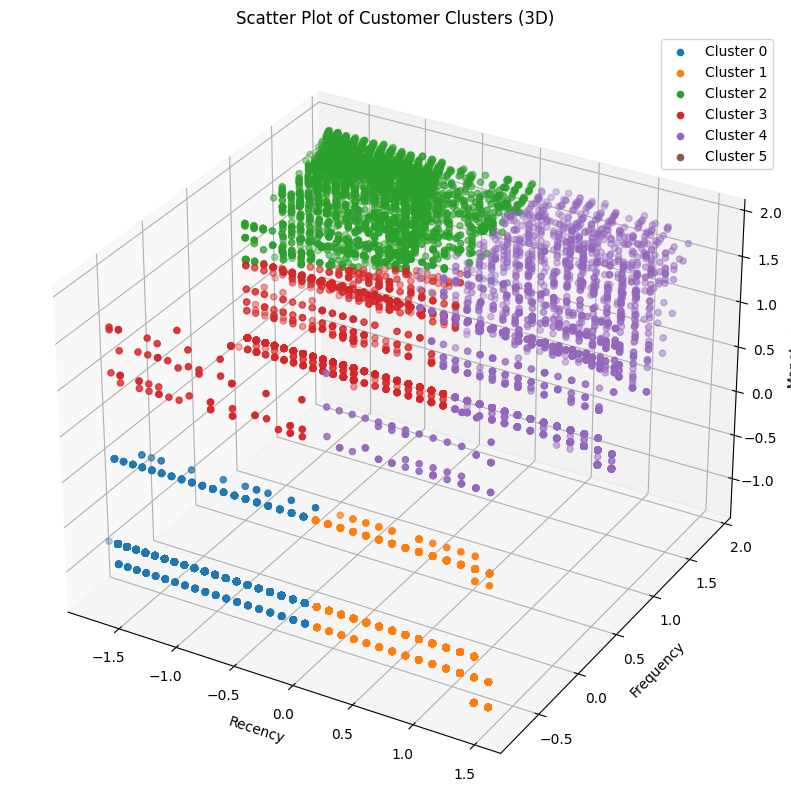

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X = X_df[['Recency_Value', 'Frequency_Value', 'Monetary_Value']]
k = 6

for cluster in range(k):
    cluster_data = X[X_df['Cluster'] == cluster]

    ax.scatter(cluster_data['Recency_Value'], cluster_data['Frequency_Value'], cluster_data['Monetary_Value'], label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('Scatter Plot of Customer Clusters (3D)')

ax.legend()

plt.show()


In [ ]:
cluster_counts = X_df['Cluster'].value_counts()
print(cluster_counts)

1    8918
0    4543
2    3576
4    2735
3    2547
Name: Cluster, dtype: int64


Text(0.5, 1.0, 'Tỷ lệ số lượng người chơi theo Cluster')

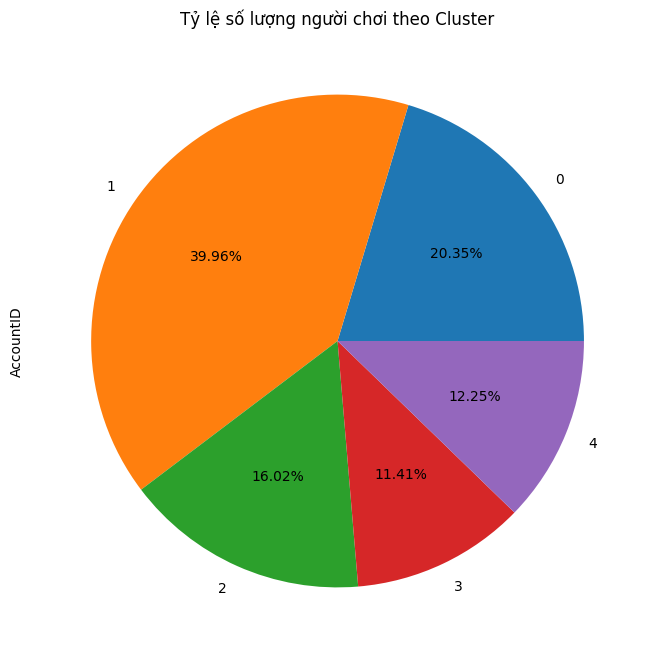

In [ ]:
rfm_df.groupby('Cluster').AccountID.count().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ số lượng người chơi theo Cluster')

In [ ]:
rfm_df.head()

,AccountID,Recency_Value,Frequency_Value,Monetary_Value,Cluster
0,3650206,59,88,20119000,2
1,3604503,61,118,29665000,2
2,3576917,59,51,13360000,2
3,3732234,61,13,2217500,2
4,3596920,60,16,2026500,2


Text(0.5, 1.0, 'Tỷ lệ số tiền từ người chơi theo Cluster')

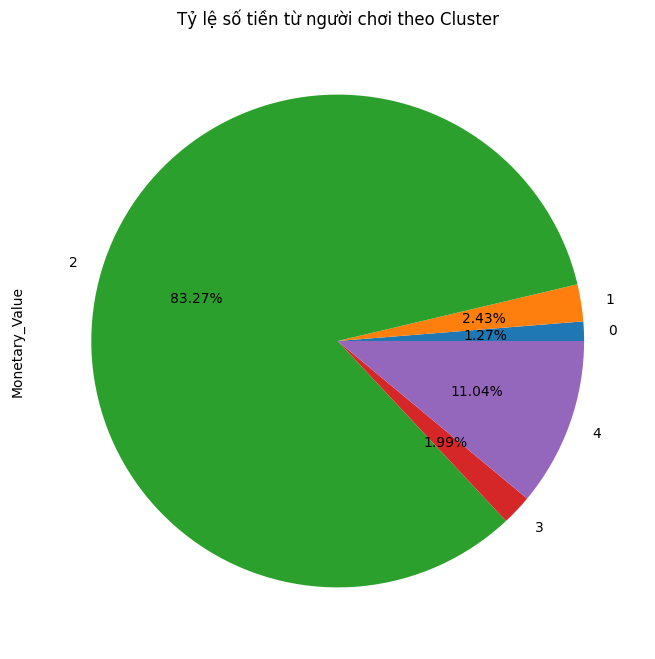

In [ ]:
rfm_df.groupby('Cluster').Monetary_Value.sum().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ số tiền từ người chơi theo Cluster')


In [ ]:
cluster_to_describe = 0
cluster_data = rfm_df[rfm_df['Cluster'] == cluster_to_describe]
#columns_to_describe = ['Recency_Value', 'Frequency_Value', 'Monetary_Value']
#quartiles = cluster_data[columns_to_describe].quantile([0.25, 0.5, 0.75])

#print("Tứ phân vị cho Cluster", cluster_to_describe)
#print(quartiles)
print(cluster_data.describe())

       Recency_Value  Frequency_Value  Monetary_Value  Cluster
count    4543.000000           4543.0     4543.000000   4543.0
mean       68.371781              1.0    25728.703500      0.0
std         5.553413              0.0     4167.108133      0.0
min        58.000000              1.0    22500.000000      0.0
25%        64.000000              1.0    25000.000000      0.0
50%        69.000000              1.0    25000.000000      0.0
75%        73.000000              1.0    25000.000000      0.0
max        78.000000              1.0    49000.000000      0.0


In [ ]:
cluster_to_describe = 1
cluster_data = rfm_df[rfm_df['Cluster'] == cluster_to_describe]
#columns_to_describe = ['Recency_Value', 'Frequency_Value', 'Monetary_Value']
#quartiles = cluster_data[columns_to_describe].quantile([0.25, 0.5, 0.75])

#print("Tứ phân vị cho Cluster", cluster_to_describe)
#print(quartiles)
print(cluster_data.describe())

       Recency_Value  Frequency_Value  Monetary_Value  Cluster
count    8918.000000           8918.0     8918.000000   8918.0
mean       85.627159              1.0    25024.557076      1.0
std         3.926362              0.0     4600.175553      0.0
min        78.000000              1.0    20000.000000      1.0
25%        82.000000              1.0    25000.000000      1.0
50%        86.000000              1.0    25000.000000      1.0
75%        89.000000              1.0    25000.000000      1.0
max        91.000000              1.0    49000.000000      1.0


In [ ]:
cluster_to_describe = 2
cluster_data = rfm_df[rfm_df['Cluster'] == cluster_to_describe]
#columns_to_describe = ['Recency_Value', 'Frequency_Value', 'Monetary_Value']
#quartiles = cluster_data[columns_to_describe].quantile([0.25, 0.5, 0.75])

#print("Tứ phân vị cho Cluster", cluster_to_describe)
#print(quartiles)
print(cluster_data.describe())

       Recency_Value  Frequency_Value  Monetary_Value  Cluster
count    3576.000000      3576.000000    3.576000e+03   3576.0
mean       65.065716        12.855425    2.141914e+06      2.0
std         4.968701        28.565637    8.039214e+06      0.0
min        58.000000         2.000000    8.900000e+04      2.0
25%        60.000000         4.000000    2.490000e+05      2.0
50%        65.000000         7.000000    5.970000e+05      2.0
75%        70.000000        13.000000    1.571250e+06      2.0
max        78.000000      1232.000000    2.652715e+08      2.0


In [ ]:
cluster_to_describe = 2
cluster_data = rfm_df[rfm_df['Cluster'] == cluster_to_describe]
#columns_to_describe = ['Recency_Value', 'Frequency_Value', 'Monetary_Value']
#quartiles = cluster_data[columns_to_describe].quantile([0.25, 0.5, 0.75])

#print("Tứ phân vị cho Cluster", cluster_to_describe)
#print(quartiles)
print(cluster_data.describe())

       Recency_Value  Frequency_Value  Monetary_Value  Cluster
count    3576.000000      3576.000000    3.576000e+03   3576.0
mean       65.065716        12.855425    2.141914e+06      2.0
std         4.968701        28.565637    8.039214e+06      0.0
min        58.000000         2.000000    8.900000e+04      2.0
25%        60.000000         4.000000    2.490000e+05      2.0
50%        65.000000         7.000000    5.970000e+05      2.0
75%        70.000000        13.000000    1.571250e+06      2.0
max        78.000000      1232.000000    2.652715e+08      2.0


In [ ]:
cluster_to_describe = 3
cluster_data = rfm_df[rfm_df['Cluster'] == cluster_to_describe]
#columns_to_describe = ['Recency_Value', 'Frequency_Value', 'Monetary_Value']
#quartiles = cluster_data[columns_to_describe].quantile([0.25, 0.5, 0.75])

#print("Tứ phân vị cho Cluster", cluster_to_describe)
#print(quartiles)
print(cluster_data.describe())

       Recency_Value  Frequency_Value  Monetary_Value  Cluster
count    2547.000000      2547.000000    2.547000e+03   2547.0
mean       68.425599         2.184923    7.177051e+04      3.0
std         4.518733         0.466430    1.142086e+05      0.0
min        58.000000         1.000000    4.250000e+04      3.0
25%        66.000000         2.000000    5.000000e+04      3.0
50%        69.000000         2.000000    5.000000e+04      3.0
75%        70.000000         2.000000    7.500000e+04      3.0
max        78.000000         4.000000    2.490000e+06      3.0


In [ ]:
rfm_df.head()

,AccountID,Recency_Value,Frequency_Value,Monetary_Value,Cluster
0,3650206,59,88,20119000,2
1,3604503,61,118,29665000,2
2,3576917,59,51,13360000,2
3,3732234,61,13,2217500,2
4,3596920,60,16,2026500,2


1    39.956987
0    20.354855
2    16.022223
4    12.254133
3    11.411802
Name: Cluster, dtype: float64
Cluster
0     116885500
1     223169000
2    7659486000
3     182799500
4    1015852500
Name: Monetary_Value, dtype: int64
9198192500
Cluster
0     1.270744
1     2.426227
2    83.271643
3     1.987342
4    11.044045
Name: Monetary_Value, dtype: float64


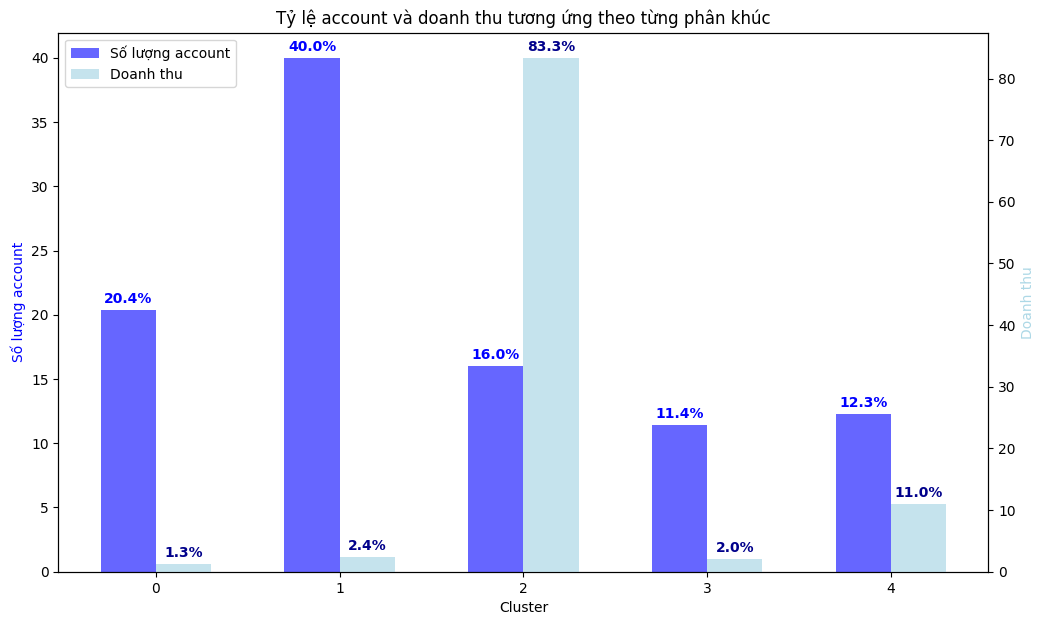

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cluster_counts = rfm_df['Cluster'].value_counts()
total_customers = len(rfm_df)
cluster_customer_ratio = (cluster_counts / total_customers) * 100
print(cluster_customer_ratio)

num_clusters = len(cluster_counts)

cluster_revenue = rfm_df.groupby('Cluster')['Monetary_Value'].sum()
print(cluster_revenue)
total_revenue = rfm_df['Monetary_Value'].sum()
print(total_revenue)
cluster_total_revenue = (cluster_revenue / total_revenue) *100
print(cluster_total_revenue)

cluster_counts = cluster_counts.sort_index()
cluster_customer_ratio = cluster_customer_ratio.sort_index()
cluster_total_revenue = cluster_total_revenue.sort_index()
x = np.arange(num_clusters)

width = 0.3
fig, ax1 = plt.subplots(figsize=(12, 7))

bars1 = ax1.bar(x - width / 2, cluster_customer_ratio, width, label='Số lượng account', alpha=0.6, color='blue')

for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='blue')

ax1.set_xlabel('Cluster')
ax1.set_ylabel('Số lượng account', color='blue')
ax2 = ax1.twinx()

bars2 = ax2.bar(x + width / 2, cluster_total_revenue, width, label='Doanh thu', color='lightblue', alpha=0.7)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='darkblue')

ax2.set_ylabel('Doanh thu', color='lightblue')

ax1.set_xticks(x)
ax1.set_xticklabels(cluster_counts.index)

plt.title('Tỷ lệ account và doanh thu tương ứng theo từng phân khúc')
#plt.legend(loc='upper left', labels=['Doanh thu', 'Số lượng account'])
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
#lt.legend(loc='upper right', labels=['Số lượng account', 'Số lượng account'])
plt.show()

1    8918
0    4543
2    3576
4    2735
3    2547
Name: Cluster, dtype: int64
Cluster
0     116.8855
1     223.1690
2    7659.4860
3     182.7995
4    1015.8525
Name: Monetary_Value, dtype: float64


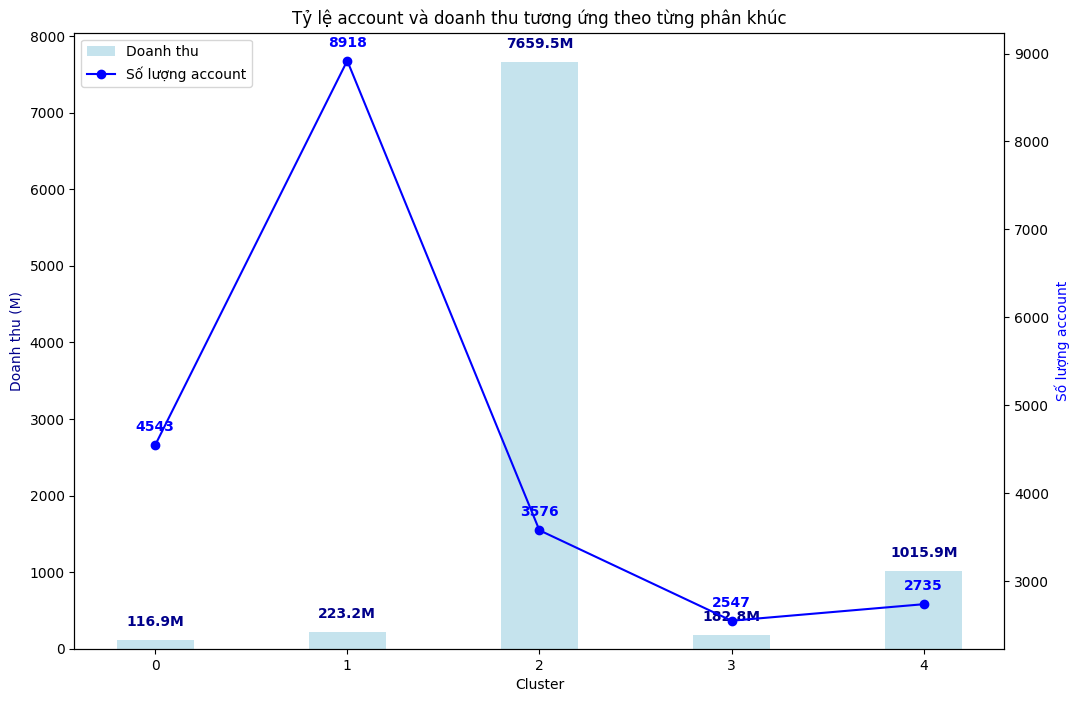

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cluster_counts = rfm_df['Cluster'].value_counts()
print(cluster_counts)

num_clusters = len(cluster_counts)
cluster_revenue = rfm_df.groupby('Cluster')['Monetary_Value'].sum() / 1e6
print(cluster_revenue)


cluster_counts = cluster_counts.sort_index()
#cluster_customer_ratio = cluster_customer_ratio.sort_index()
cluster_revenue = cluster_revenue.sort_index()
x = np.arange(num_clusters)

x = np.arange(num_clusters)
fig, ax1 = plt.subplots(figsize=(12, 8))

bars1 = ax1.bar(x, cluster_revenue, width=0.4, label='Doanh thu', color='lightblue', alpha=0.7)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}M',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 8),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='darkblue')

ax1.set_xlabel('Cluster')
ax1.set_ylabel('Doanh thu (M)', color='darkblue')
ax2 = ax1.twinx()

line2 = ax2.plot(x, cluster_counts, marker='o', linestyle='-', color='blue', label='Số lượng account')

for i, value in enumerate(cluster_counts):
    ax2.annotate(f'{value}',
                 xy=(x[i], value),
                 xytext=(0, 8),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='blue')

ax2.set_ylabel('Số lượng account', color='blue')

ax1.set_xticks(x)
ax1.set_xticklabels(cluster_counts.index)

plt.title('Tỷ lệ account và doanh thu tương ứng theo từng phân khúc')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 145047
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AccountID        22319 non-null  object
 1   Recency_Value    22319 non-null  int64 
 2   Frequency_Value  22319 non-null  int64 
 3   Monetary_Value   22319 non-null  int64 
 4   Cluster          22319 non-null  int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 959.0+ KB


In [ ]:
rfm_df.head(10)

,AccountID,Recency_Value,Frequency_Value,Monetary_Value,Cluster
0,3650206,59,88,20119000,2
1,3604503,61,118,29665000,2
2,3576917,59,51,13360000,2
3,3732234,61,13,2217500,2
4,3596920,60,16,2026500,2
6,3615671,62,4,1002000,2
8,3727973,62,1,25000,0
9,3572892,58,115,27190500,2
12,3727296,62,4,298000,2
13,3709921,61,12,6380000,2


In [ ]:
#rfm_df.to_csv('/content/drive/MyDrive/rfm_df.csv', index=False)
#df = pd.read_csv('/content/drive/MyDrive/rfm_df.csv')
#df.head(10)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74524 entries, 0 to 145050
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransID                   74524 non-null  object        
 1   AccountID                 74524 non-null  object        
 2   AccountName               74524 non-null  object        
 3   PortalCode                74524 non-null  object        
 4   GameCode                  74524 non-null  object        
 5   GameServer                74524 non-null  object        
 6   NickName                  74524 non-null  object        
 7   PackageID                 74524 non-null  int64         
 8   GameAmount                74524 non-null  int64         
 9   TopupAmount               74524 non-null  int64         
 10  PaymentType               74524 non-null  int64         
 11  PaymentName               74524 non-null  object        
 12  TopupDesc        

In [ ]:
#new_df['DayKey'] = new_df['TopupTime'].map(lambda date: 100*date.month+ date.day)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

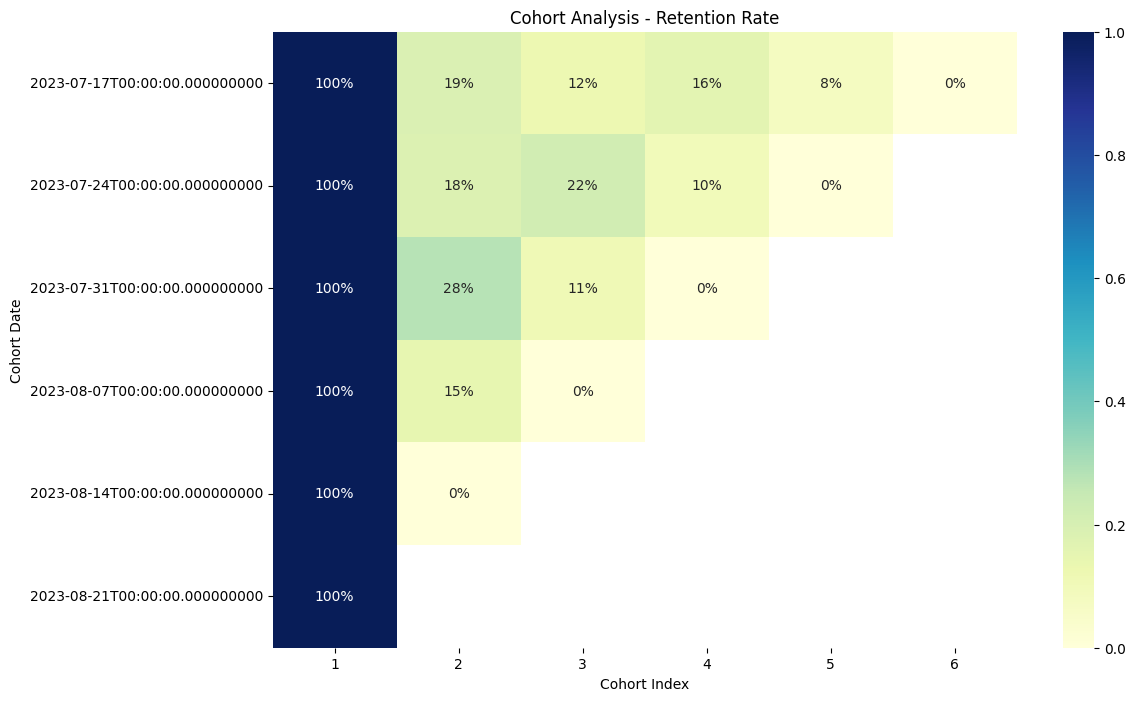

In [ ]:
new_df['CohortDate'] = new_df.groupby('AccountID')['TopupDate'].transform('min').dt.to_period('W')
new_df['CohortDate'] = new_df['CohortDate'].dt.to_timestamp()
new_df['TopupDate'] = pd.to_datetime(new_df['TopupDate'])

new_df['CohortIndex'] = ((new_df['TopupDate'] - new_df['CohortDate']).dt.days / 7).astype(int) + 1
cohort_data = new_df.groupby(['CohortDate', 'CohortIndex'])['AccountID'].nunique().reset_index()


cohort_matrix = cohort_data.pivot(index='CohortDate', columns='CohortIndex', values='AccountID')

cohort_size = cohort_matrix.iloc[:, 0]
retention = cohort_matrix.divide(cohort_size, axis=0)
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=1)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Date')
plt.show()


#### Data khác ngoài bảng websale

##### VwAccountLogin

In [ ]:
!gdown https://drive.google.com/file/d/1g4vBpLjRQdURDJbmOVs_bp__P-jNx-ZK/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1g4vBpLjRQdURDJbmOVs_bp__P-jNx-ZK
To: /content/VwAccountLogin.csv
100% 125M/125M [00:01<00:00, 63.1MB/s]


In [ ]:
nru_data = pd.read_csv('/content/gdrive/MyDrive/VwAccountLogin.csv')
nru_data.head()

,LogID,AccountID,AccountName,PortalCode,GameCode,LoginTime,LoginDate,LoginIP,OSType,OSVersion,Device,ClientID
0,6924027,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:39:46,2022-12-20,14.232.166.121,3,10,NaN,fqa.web
1,6924207,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:47:13,2022-12-20,118.70.125.152,3,10,NaN,fqa.web
2,6924282,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:50:37,2022-12-20,113.20.108.35,3,10,NaN,fqa.web
3,6957092,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-21T17:03:02,2022-12-21,113.20.108.35,3,10,NaN,fqa.web
4,7013066,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-23T14:15:56,2022-12-23,14.232.166.121,3,10,NaN,fqa.web


In [ ]:
nru_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   LogID        1048575 non-null  int64 
 1   AccountID    1048575 non-null  int64 
 2   AccountName  891676 non-null   object
 3   PortalCode   1048575 non-null  object
 4   GameCode     996743 non-null   object
 5   LoginTime    1048575 non-null  object
 6   LoginDate    1048575 non-null  object
 7   LoginIP      609287 non-null   object
 8   OSType       1048575 non-null  int64 
 9   OSVersion    968360 non-null   object
 10  Device       747109 non-null   object
 11  ClientID     1033044 non-null  object
dtypes: int64(3), object(9)
memory usage: 96.0+ MB


In [ ]:
login_data = nru_data.sort_values(by=['AccountID', 'LoginDate'])
login_data.head()


,LogID,AccountID,AccountName,PortalCode,GameCode,LoginTime,LoginDate,LoginIP,OSType,OSVersion,Device,ClientID
0,6924027,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:39:46,2022-12-20,14.232.166.121,3,10,NaN,fqa.web
1,6924207,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:47:13,2022-12-20,118.70.125.152,3,10,NaN,fqa.web
2,6924282,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:50:37,2022-12-20,113.20.108.35,3,10,NaN,fqa.web
3,6957092,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-21T17:03:02,2022-12-21,113.20.108.35,3,10,NaN,fqa.web
4,7013066,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-23T14:15:56,2022-12-23,14.232.166.121,3,10,NaN,fqa.web


In [ ]:
login_data_1 = login_data[(login_data[ 'LoginDate'] >= '2023-07-19')& (login_data[ 'LoginDate'] <= '2023-08-22')& (df['GameCode'] == 'bietdoi') ]
login_data_1.head()

,LogID,AccountID,AccountName,PortalCode,GameCode,LoginTime,LoginDate,LoginIP,OSType,OSVersion,Device,ClientID
139264,16754096,4031,fid_3D5A4LDP,Funzy,bietdoi,2023-08-09T03:35:07,2023-08-09,42.113.99.20,1,Android 9,007fbcbb10a8f779,bietdoi.sdk
139265,16754102,4031,fid_3D5A4LDP,Funzy,bietdoi,2023-08-09T03:35:10,2023-08-09,NaN,1,Android 9,Samsung SM-G955N,bietdoi.sdk
139266,16754114,4031,fid_3D5A4LDP,Funzy,bietdoi,2023-08-09T03:35:29,2023-08-09,NaN,1,Android 9,Samsung SM-G955N,bietdoi.sdk
139267,16754267,4031,fid_3D5A4LDP,Funzy,bietdoi,2023-08-09T03:39:10,2023-08-09,NaN,1,Android 9,Samsung SM-G955N,bietdoi.sdk
139268,17404027,4031,fid_3D5A4LDP,Funzy,bietdoi,2023-08-12T00:01:30,2023-08-12,NaN,1,Android 9,Samsung SM-G955N,bietdoi.sdk


In [ ]:
login_data_1['LoginDate'] = pd.to_datetime(login_data_1['LoginDate'])
login_data_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 139264 to 122874
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LogID        6273 non-null   int64         
 1   AccountID    6273 non-null   int64         
 2   AccountName  6270 non-null   object        
 3   PortalCode   6273 non-null   object        
 4   GameCode     5879 non-null   object        
 5   LoginTime    6273 non-null   object        
 6   LoginDate    6273 non-null   datetime64[ns]
 7   LoginIP      4251 non-null   object        
 8   OSType       6273 non-null   int64         
 9   OSVersion    5700 non-null   object        
 10  Device       5611 non-null   object        
 11  ClientID     6164 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 637.1+ KB


In [ ]:
#login_data_1.to_csv('/content/drive/MyDrive/login_data_1.csv', index=False)

In [ ]:
# import pandas as pd
# login_data_1 = pd.read_csv('/content/drive/MyDrive/login_data_1.csv')
# login_data_1['media_source'] = login_data_1['media_source'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)
# login_data_1['Campaign'] = login_data_1['Campaign'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)
# login_data_1['Adset'] = login_data_1['Adset'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)
# login_data_1['campaign_type'] = login_data_1['campaign_type'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)

# # login_data_1 = login_data_1.merge(media_data_final, left_on='AccountID', right_on='user_id', how='left')

# print(login_data_1)


###### Comment

In [ ]:
# current_date =new_df['TopupDate'].max() + pd.to_timedelta(1, 'D')
# current_date

In [ ]:
# recency_data3 = login_data_1.groupby('AccountID')['LoginDate'].max().reset_index()
# recency_data3['Recency'] = (current_date - recency_data3['LoginDate']).dt.days
# recency_data3 = recency_data3[['AccountID', 'Recency']]
# recency_data3.info()

In [ ]:
# df_frequency.info()

In [ ]:
# recency_data3['AccountID'] = recency_data3['AccountID'].astype(str)
# recency_data3['AccountID'].info()

In [ ]:
# df_monetary.info()

In [ ]:
# # Kết hợp Recency, Frequency và Monetary dựa trên 'AccountID'
# rfm_data3 = recency_data3.merge(df_frequency, on='AccountID', how='left')
# rfm_data3 = rfm_data3.merge(df_monetary, on='AccountID', how='left')
# rfm_data3.info()
# # Tính toán RFM score dựa trên các biến này
# rfm_data3['RFM_Score'] = (1/3 * rfm_data3['Recency']) + (1/3 * rfm_data3['Frequency']) + (1/3 * rfm_data3['Monetary'])
# rfm_data3.head(30)

##### af_registration

In [ ]:
!gdown https://drive.google.com/file/d/1WF0kvpWeFzCddQOuJRX_pSWnOa8OgCFx/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1WF0kvpWeFzCddQOuJRX_pSWnOa8OgCFx
To: /content/af_registration.csv
100% 59.8M/59.8M [00:00<00:00, 268MB/s]


In [ ]:
df3 = pd.read_csv('/content/af_registration.csv',encoding="ISO-8859-1")
df3.head(10)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203286 entries, 0 to 203285
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   attibute_touch_time  133062 non-null  object 
 1   install_time         203286 non-null  object 
 2   event_time           203286 non-null  object 
 3   partner              2109 non-null    object 
 4   media_source         203286 non-null  object 
 5   campaign             189539 non-null  object 
 6   adset                180874 non-null  object 
 7   campaign_type        203286 non-null  object 
 8   region               201893 non-null  object 
 9   country_code         201895 non-null  object 
 10  state                201895 non-null  object 
 11  city                 201895 non-null  object 
 12  ip                   203286 non-null  object 
 13  operator             137470 non-null  object 
 14  carrier              133691 non-null  object 
 15  appsflyer_id     

In [ ]:
# rfm_df= pd.read_csv('/content/gdrive/MyDrive/rfm_df.csv')
# rfm_df.info()

In [ ]:
new_df3 = df3[(df3[['event_time']] >= '2023-07-19').all(axis=1)]
new_df3.head(10)

,attibute_touch_time,install_time,event_time,partner,media_source,campaign,adset,campaign_type,region,country_code,...,operator,carrier,appsflyer_id,customer_user_id,platform,device_type,os_version,device_model,device_category,event_name
200,NaN,2023-07-21 14:17:09,2023-07-21 14:17:57,NaN,restricted,NaN,NaN,non-organic,Asia,Viet Nam,...,NaN,NaN,1689429637098-5483785,3544132,ios,NaN,15.7.7,iPhone7Plus,phone,af_registration
204,NaN,2023-07-19 14:56:01,2023-07-21 10:07:59,NaN,organic,organic,organic,organic,Asia,Viet Nam,...,NaN,NaN,1689429640139-5024999,1015220,ios,NaN,15.4,iPhoneXSMax,phone,af_login
589,NaN,2023-07-16 19:08:31,2023-07-21 20:37:06,NaN,organic,organic,organic,organic,Asia,Viet Nam,...,NaN,NaN,1689508778743-8337373,3548974,ios,NaN,16.5.1,iPhoneXSMax,phone,af_registration
1245,2023-07-16 21:47:19,2023-07-17 10:00:35,2023-07-21 00:51:49,NaN,Facebook Ads,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,non-organic,Asia,Viet Nam,...,Vinaphone,vinaphone,1689562818230-3761536952091896946,3538301,android,NaN,13,Redmi::M2101K6G,phone,af_login
1246,NaN,2023-07-17 15:04:46,2023-07-21 00:48:15,NaN,restricted,NaN,NaN,non-organic,Asia,Viet Nam,...,Viettel,viettel,1689581055836-8805456490359433886,3538591,android,NaN,10,Redmi::Redmi Note 9S,phone,af_registration
1247,2023-07-16 12:33:04,2023-07-17 21:20:44,2023-07-21 19:57:25,NaN,Facebook Ads,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,non-organic,Asia,Viet Nam,...,MobiFone,mobifone,1689603565450-1787607642709675208,3548310,android,NaN,9,xiaomi::Redmi 6 Pro,phone,af_registration
1248,2023-07-18 06:37:40,2023-07-18 06:45:59,2023-07-21 20:10:03,NaN,googleadwords_int,2023.07.15_Google_BDDD_Appinstall_AOS_InstallMax,Clip tá»ng,non-organic,Asia,Viet Nam,...,Viettel,viettel,1689637484873-3765238157590712843,3548498,android,NaN,12,vivo::V2111,phone,af_registration
1249,2023-07-17 20:31:12,2023-07-18 08:04:07,2023-07-21 01:30:31,NaN,fanpageofficial,dundun,NaN,non-organic,Asia,Viet Nam,...,Viettel,NaN,1689642199557-1676887178215287053,3028973,android,NaN,13,samsung::SM-A037F,phone,af_registration
1250,NaN,2023-07-19 09:58:48,2023-07-21 21:17:45,NaN,restricted,NaN,NaN,non-organic,Asia,Viet Nam,...,NaN,NaN,1689667308380-1707783,3549627,ios,NaN,16.5.1,iPhone11ProMax,phone,af_registration
1251,2023-07-18 16:34:56,2023-07-18 16:45:32,2023-07-21 00:35:19,NaN,googleadwords_int,2023.07.15_Google_BDDD_Appinstall_AOS_InstallMax,Clip tá»ng,non-organic,Asia,Viet Nam,...,Viettel,viettel,1689673515310-7191639116882747506,3538520,android,NaN,12,blackshark::SHARK PRS-A0,phone,af_registration


In [ ]:
#new_df3[new_df3['country_code'].isnull()]

In [ ]:
import pandas as pd
country_counts = new_df3['country_code'].value_counts()
print(country_counts)

Viet Nam                            191079
United States                         2447
Japan                                  556
None                                   513
Malaysia                               309
Taiwan                                 267
South Korea                            213
Australia                              169
Cambodia                                66
Singapore                               54
Germany                                 50
Canada                                  39
Russian Federation                      27
Lao People's Democratic Republic        26
France                                  20
Philippines                             20
Thailand                                18
Hong Kong                               12
Czechia                                 12
unknown                                 11
Sweden                                  10
China                                   10
Poland                                   9
United Arab

In [ ]:
country_df = pd.DataFrame({'country_code': country_counts.index, 'count': country_counts.values})
country_df.head()

,country_code,count
0,Viet Nam,191079
1,United States,2447
2,Japan,556
3,None,513
4,Malaysia,309


In [ ]:
country_df.to_csv('/content/gdrive/MyDrive/country_df', index= False)
country = pd.read_csv('/content/gdrive/MyDrive/country_df')
country.head()

,country_code,count
0,Viet Nam,191079
1,United States,2447
2,Japan,556
3,None,513
4,Malaysia,309


In [ ]:
from IPython.display import display, HTML
import plotly.graph_objs as go

In [ ]:
from plotly.offline import init_notebook_mode,iplot


In [ ]:
pip install plotly

In [ ]:
data = dict(type='choropleth',
locations = country_counts.index,
locationmode = 'country names', z = country_counts,
text = country_counts.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

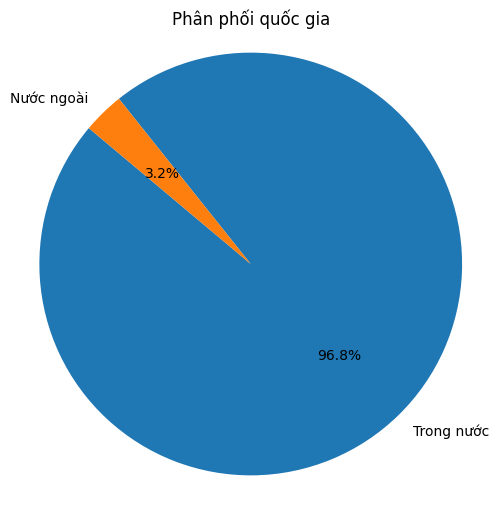

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

new_df3['Country_Group'] = new_df3['country_code'].apply(lambda x: 'Trong nước' if (x == 'Viet Nam' or x=='VN') else 'Nước ngoài')

group_counts = new_df3['Country_Group'].value_counts()
group_counts

plt.figure(figsize=(6, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối quốc gia')
plt.axis('equal')
plt.show()


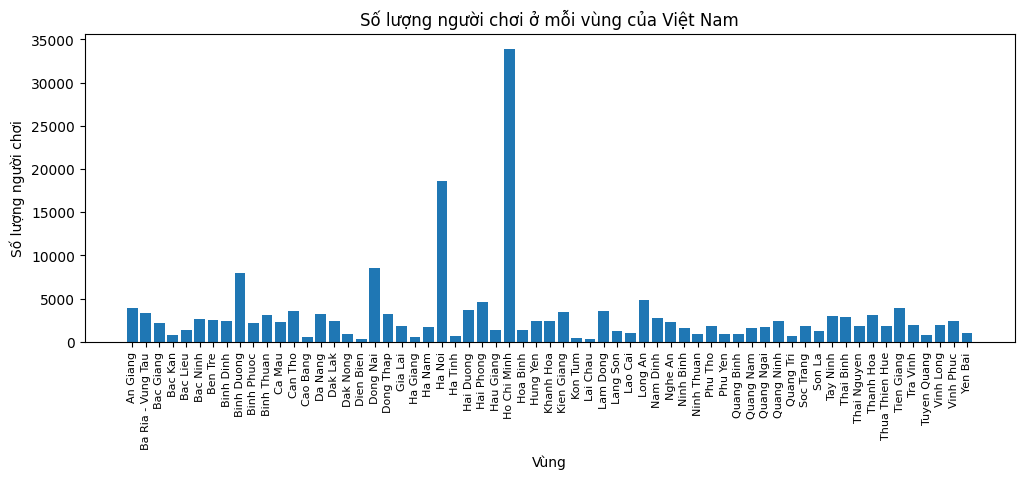

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lọc dữ liệu theo điều kiện country_code
filtered_data = new_df3[
    (new_df3['country_code'] == 'Viet Nam') | (new_df3['country_code'] == 'VN')
]

# Sử dụng groupby để đếm số lượng người chơi theo vùng (state)
region_counts = filtered_data.groupby('state')['customer_user_id'].count().reset_index()
region_df = pd.DataFrame({'country_code': country_counts.index, 'count': country_counts.values})
region_df.head()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 4))
plt.bar(region_counts['state'], region_counts['customer_user_id'])
plt.xlabel('Vùng')
plt.ylabel('Số lượng người chơi')
plt.title('Số lượng người chơi ở mỗi vùng của Việt Nam')
plt.xticks(rotation=90, fontsize=8)
plt.show()


In [ ]:
pip install geopandas


In [ ]:
import pandas as pd

media_final = new_df3.copy()
media_final['create_time'] = pd.to_datetime(media_final['event_time']).dt.strftime('%B %d, %Y')
new_media_final = media_final[(media_final[['create_time']] >= '2023-07-19').all(axis=1)]
media_final['media_source'] = media_final.apply(
    lambda row: 'organic' if row['campaign_type'] == 'organic' and row['media_source'] == 'NaN'
    else 'unknown' if row['campaign_type'] == 'unknown' and row['media_source'] == 'NaN'
    else row['media_source'],
    axis=1
)
media_final['Campaign'] = media_final.apply(
    lambda row: 'organic' if row['campaign_type'] == 'organic' and row['campaign'] == 'NaN'
    else 'unknown' if row['campaign_type'] == 'unknown' and row['campaign'] == 'NaN'
    else row['campaign'],
    axis=1
)
media_final['Adset'] = media_final.apply(
    lambda row: 'organic' if row['campaign_type'] == 'organic' and row['adset'] == 'NaN'
    else 'unknown' if row['campaign_type'] == 'unknown' and row['adset'] == 'NaN'
    else row['adset'],
    axis=1
)
media_final = media_final[['customer_user_id', 'create_time', 'media_source', 'Campaign', 'Adset', 'campaign_type']]
media_final.columns = ['user_id', 'create_time', 'media_source', 'Campaign', 'Adset', 'campaign_type']
#print(media_final)
media_final.head(100)

,user_id,create_time,media_source,Campaign,Adset,campaign_type
200,3544132,"July 21, 2023",restricted,NaN,NaN,non-organic
204,1015220,"July 21, 2023",organic,organic,organic,organic
589,3548974,"July 21, 2023",organic,organic,organic,organic
1245,3538301,"July 21, 2023",Facebook Ads,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,non-organic
1246,3538591,"July 21, 2023",restricted,NaN,NaN,non-organic
...,...,...,...,...,...,...
1337,3547870,"July 21, 2023",organic,organic,organic,organic
1338,3544972,"July 21, 2023",googleadwords_int,2023.07.15_Google_BDDD_Appinstall_AOS_In-app e...,animation,non-organic
1339,3550813,"July 21, 2023",googleadwords_int,2023.07.15_Google_BDDD_Appinstall_AOS_In-app e...,Funny + Giáº£ tÆ°á»ng,non-organic
1340,3549728,"July 21, 2023",organic,organic,organic,organic


In [ ]:
import pandas as pd
login_data_1 = pd.read_csv('/content/gdrive/MyDrive/login_data_1.csv')

media_final['media_source'] = media_final['media_source'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)
media_final['Campaign'] = media_final['Campaign'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)
media_final['Adset'] = media_final['Adset'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)
media_final['campaign_type'] = media_final['campaign_type'].apply(lambda x: 'unknown' if pd.isna(x) or x == '' else x)

media_final.head()


,user_id,create_time,media_source,Campaign,Adset,campaign_type
200,3544132,"July 21, 2023",restricted,unknown,unknown,non-organic
204,1015220,"July 21, 2023",organic,organic,organic,organic
589,3548974,"July 21, 2023",organic,organic,organic,organic
1245,3538301,"July 21, 2023",Facebook Ads,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,non-organic
1246,3538591,"July 21, 2023",restricted,unknown,unknown,non-organic


In [ ]:
login_data_1.head()

,LogID,AccountID,AccountName,PortalCode,GameCode,LoginTime,LoginDate,LoginIP,OSType,OSVersion,Device,ClientID
0,6924027,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:39:46,2022-12-20,14.232.166.121,3,10,NaN,fqa.web
1,6924207,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:47:13,2022-12-20,118.70.125.152,3,10,NaN,fqa.web
2,6924282,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:50:37,2022-12-20,113.20.108.35,3,10,NaN,fqa.web
3,6957092,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-21T17:03:02,2022-12-21,113.20.108.35,3,10,NaN,fqa.web
4,7013066,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-23T14:15:56,2022-12-23,14.232.166.121,3,10,NaN,fqa.web


In [ ]:
media_final.to_csv('/content/gdrive/MyDrive/media_final.csv', index=False)
media_final = pd.read_csv('/content/gdrive/MyDrive/media_final.csv')
media_final.head(10)

,user_id,create_time,media_source,Campaign,Adset,campaign_type
0,3544132,"July 21, 2023",restricted,unknown,unknown,non-organic
1,1015220,"July 21, 2023",organic,organic,organic,organic
2,3548974,"July 21, 2023",organic,organic,organic,organic
3,3538301,"July 21, 2023",Facebook Ads,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,non-organic
4,3538591,"July 21, 2023",restricted,unknown,unknown,non-organic
5,3548310,"July 21, 2023",Facebook Ads,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,20230716_Facebook_BDDD_BDDD+_Appinstall_AOS_Pr...,non-organic
6,3548498,"July 21, 2023",googleadwords_int,2023.07.15_Google_BDDD_Appinstall_AOS_InstallMax,Clip tá»ng,non-organic
7,3028973,"July 21, 2023",fanpageofficial,dundun,unknown,non-organic
8,3549627,"July 21, 2023",restricted,unknown,unknown,non-organic
9,3538520,"July 21, 2023",googleadwords_int,2023.07.15_Google_BDDD_Appinstall_AOS_InstallMax,Clip tá»ng,non-organic


In [ ]:
media_final.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,197335.0,3.379643e+06,643134.641813,4031.0,3535040.5,3590448.0,3646437.5,3712393.0


In [ ]:
login_data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
LogID,1048575.0,1.046315e+07,7.654063e+06,1.0,2735136.5,9634445.0,18705820.0,22898932.0
AccountID,1048575.0,1.325413e+06,4.238604e+05,2001.0,1024534.0,1070915.0,1814823.0,2150469.0
OSType,1048575.0,1.865008e+00,1.045042e+00,0.0,1.0,2.0,2.0,4.0


In [ ]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197335 entries, 200 to 203285
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   attibute_touch_time  128824 non-null  object 
 1   install_time         197335 non-null  object 
 2   event_time           197335 non-null  object 
 3   partner              2109 non-null    object 
 4   media_source         197335 non-null  object 
 5   campaign             184043 non-null  object 
 6   adset                175487 non-null  object 
 7   campaign_type        197335 non-null  object 
 8   region               196011 non-null  object 
 9   country_code         196011 non-null  object 
 10  state                196011 non-null  object 
 11  city                 196011 non-null  object 
 12  ip                   197335 non-null  object 
 13  operator             133028 non-null  object 
 14  carrier              129313 non-null  object 
 15  appsflyer_id   

In [ ]:
# import pandas as pd
login_data_1 = pd.read_csv('/content/gdrive/MyDrive/login_data_1.csv')
media_data_final = pd.read_csv('/content/gdrive/MyDrive/media_final.csv')

merged_data = pd.merge(login_data_1, media_data_final, left_on='AccountID', right_on='user_id', how='left')
merged_data.head()


,LogID,AccountID,AccountName,PortalCode,GameCode,LoginTime,LoginDate,LoginIP,OSType,OSVersion,Device,ClientID,user_id,create_time,media_source,Campaign,Adset,campaign_type
0,6924027,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:39:46,2022-12-20,14.232.166.121,3,10,NaN,fqa.web,NaN,NaN,NaN,NaN,NaN,NaN
1,6924207,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:47:13,2022-12-20,118.70.125.152,3,10,NaN,fqa.web,NaN,NaN,NaN,NaN,NaN,NaN
2,6924282,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-20T13:50:37,2022-12-20,113.20.108.35,3,10,NaN,fqa.web,NaN,NaN,NaN,NaN,NaN,NaN
3,6957092,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-21T17:03:02,2022-12-21,113.20.108.35,3,10,NaN,fqa.web,NaN,NaN,NaN,NaN,NaN,NaN
4,7013066,2001,fid_3D5A4JTD,Funzy,NaN,2022-12-23T14:15:56,2022-12-23,14.232.166.121,3,10,NaN,fqa.web,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
media_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197335 entries, 0 to 197334
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        197335 non-null  int64 
 1   create_time    197335 non-null  object
 2   media_source   197335 non-null  object
 3   Campaign       197335 non-null  object
 4   Adset          197335 non-null  object
 5   campaign_type  197335 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.0+ MB


In [ ]:
login_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   LogID        1048575 non-null  int64 
 1   AccountID    1048575 non-null  int64 
 2   AccountName  891676 non-null   object
 3   PortalCode   1048575 non-null  object
 4   GameCode     996743 non-null   object
 5   LoginTime    1048575 non-null  object
 6   LoginDate    1048575 non-null  object
 7   LoginIP      609287 non-null   object
 8   OSType       1048575 non-null  int64 
 9   OSVersion    968360 non-null   object
 10  Device       747109 non-null   object
 11  ClientID     1033044 non-null  object
dtypes: int64(3), object(9)
memory usage: 96.0+ MB


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   LogID          1048575 non-null  int64  
 1   AccountID      1048575 non-null  int64  
 2   AccountName    891676 non-null   object 
 3   PortalCode     1048575 non-null  object 
 4   GameCode       996743 non-null   object 
 5   LoginTime      1048575 non-null  object 
 6   LoginDate      1048575 non-null  object 
 7   LoginIP        609287 non-null   object 
 8   OSType         1048575 non-null  int64  
 9   OSVersion      968360 non-null   object 
 10  Device         747109 non-null   object 
 11  ClientID       1033044 non-null  object 
 12  user_id        311358 non-null   float64
 13  create_time    311358 non-null   object 
 14  media_source   311358 non-null   object 
 15  Campaign       311358 non-null   object 
 16  Adset          311358 non-null   object 
 17  campaign

In [ ]:
login_data = merged_data.copy()

login_data['LoginDate'] = pd.to_datetime(login_data['LoginDate'])
login_data['create_time'] = pd.to_datetime(login_data['create_time'])

def calculate_R(row, day):
    if (row['LoginDate'] - row['create_time']).days == day:
        return 1
    return 0

for day in range(1, 31):
    login_data[f'R{day}'] = login_data.apply(lambda row: calculate_R(row, day), axis=1)

login_data_filtered = login_data.loc[
    (login_data['media_source'] == '{{media_source}}') &
    (login_data['Campaign'] == '{{Campaign}}') &
    (login_data['Adset'] == '{{Adset}}') &
    (login_data['campaign_type'] == '{{campaign_type}}')
]
NRU = login_data_filtered['AccountID'].nunique()

RR_columns = [f'R{day}' for day in range(1, 31)]
RR = (login_data_filtered[RR_columns].sum() / NRU) * 100

result_df = pd.DataFrame({
    'Date': login_data_filtered['create_time'],
    'NRU': [NRU] * len(login_data_filtered),
})
result_df[RR_columns] = RR

from_date = pd.to_datetime('2023-07-19')
to_date = pd.to_datetime('2023-08-22')

result_df = result_df.loc[(result_df['Date'] >= from_date) & (result_df['Date'] <= to_date)]
result_df = result_df.sort_values(by='Date', ascending=False)

print(result_df)


Empty DataFrame
Columns: [Date, NRU, R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16, R17, R18, R19, R20, R21, R22, R23, R24, R25, R26, R27, R28, R29, R30]
Index: []

[0 rows x 32 columns]


In [ ]:
result_df.head()

,Date,NRU,R1,R2,R3,R4,R5,R6,R7,R8,...,R21,R22,R23,R24,R25,R26,R27,R28,R29,R30


In [ ]:
df.head()

,TransID,AccountID,AccountName,PortalCode,GameCode,GameServer,NickName,PackageID,GameAmount,TopupAmount,...,OsName,OSVersion,Device,StatusAddItem,AddItemTime,ItemList,UpdateStatusAddItemCount,UpdatedUser,UpdatedTime,VersionApp
0,1000011,3650206,fb_1030192227992593,Funzy,bietdoi,10066,Sindulcie,1318,98,98,...,iOS,NaN,NaN,1,2023-08-17 09:48:49.720,dundun.funzy.ios199,1,None,2023-08-17 09:48:49.583,1.3.0
1,1000013,3604503,fb_6431906926907132,Funzy,bietdoi,10047,Báº¥t Biáº¿n,1320,498,498,...,iOS,NaN,NaN,1,2023-08-17 09:48:54.153,dundun.funzy.ios999,1,None,2023-08-17 09:48:54.030,1.3.0
2,1000014,3576917,fid_12RBK7CQ,Funzy,bietdoi,10034,ÄÃ¤ hÃ«Ã¶à¦,1314,998,998,...,Android,NaN,NaN,1,2023-08-17 09:48:56.223,dundun.funzy.and1999,1,None,2023-08-17 09:48:55.980,1.0.0
3,1000017,3732234,gg_106040687124253107606,Funzy,bietdoi,10024,247690,89,0,45,...,iOS,NaN,NaN,1,2023-08-17 09:49:09.377,221,1,None,2023-08-17 09:49:09.307,NaN
4,1000018,3596920,fid_12ZIHD7R,Funzy,bietdoi,10058,150180,114,0,218,...,iOS,NaN,NaN,1,2023-08-17 09:49:29.347,204,1,None,2023-08-17 09:49:29.260,NaN


In [ ]:
#level_data = pd.read_csv('/content/gdrive/MyDrive/VwAccountLogin.csv')
#level_data.head()

In [ ]:
!gdown https://drive.google.com/file/d/12w0E_RLnthLBY6aXcZ8Mw5kFozwD6wMa/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=12w0E_RLnthLBY6aXcZ8Mw5kFozwD6wMa
To: /content/user_level.csv
100% 18.3M/18.3M [00:00<00:00, 51.9MB/s]


In [ ]:
df2 = pd.read_csv('/content/user_level.csv',encoding="ISO-8859-1",dtype={'TransID': str,'AccountID': str})
df2.head(10)

,fid,uid,level_,server_id,create_time,update_time
0,1000001,1163,70,10001,2023-07-19T16:45:18.000+07:00,2023-08-11T06:56:17.000+07:00
1,1000006,193112,62,10001,2023-08-02T07:26:23.000+07:00,2023-08-11T06:14:47.000+07:00
2,1000007,3102,64,10001,2023-07-19T17:23:17.000+07:00,2023-08-11T01:26:30.000+07:00
3,1000008,1241,71,10001,2023-07-19T16:45:46.000+07:00,2023-08-11T06:58:17.000+07:00
4,1000010,1080,72,10001,2023-07-19T16:45:00.000+07:00,2023-08-11T05:07:28.000+07:00
5,1000011,1358,74,10001,2023-07-19T16:47:03.000+07:00,2023-08-11T05:56:04.000+07:00
6,1000012,139263,11,10001,2023-07-27T21:18:26.000+07:00,2023-07-30T04:09:51.000+07:00
7,1000017,3283,63,10001,2023-07-19T17:27:35.000+07:00,2023-08-10T21:37:43.000+07:00
8,1000021,2022,63,10001,2023-07-19T16:59:17.000+07:00,2023-08-09T16:36:22.000+07:00
9,1000028,14074,1,10005,2023-07-20T00:43:12.000+07:00,2023-07-20T00:43:12.000+07:00


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220416 entries, 0 to 220415
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fid          220416 non-null  int64 
 1   uid          220416 non-null  int64 
 2   level_       220416 non-null  int64 
 3   server_id    220416 non-null  int64 
 4   create_time  220416 non-null  object
 5   update_time  220416 non-null  object
dtypes: int64(4), object(2)
memory usage: 10.1+ MB


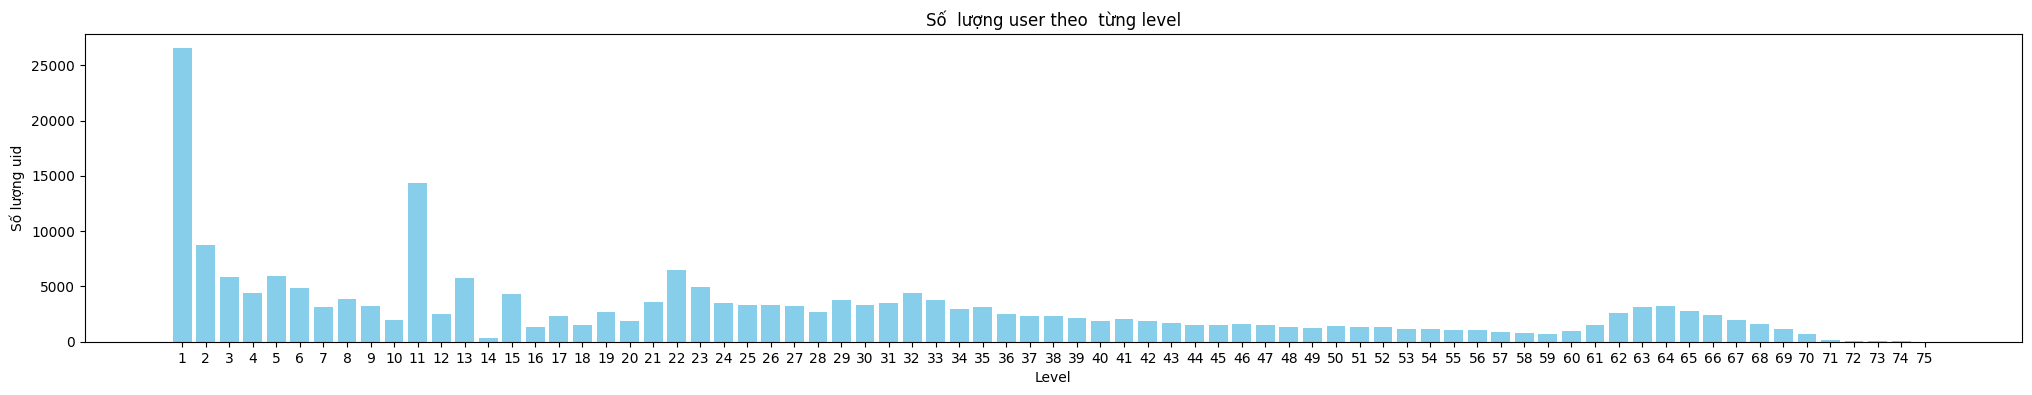

In [ ]:
import matplotlib.pyplot as plt

level_counts = df2['level_'].value_counts().sort_index()

plt.figure(figsize=(25, 4))
plt.bar(level_counts.index, level_counts.values, color='skyblue')
plt.xlabel('Level')
plt.ylabel('Số lượng uid')
plt.title('Số  lượng user theo  từng level')

plt.xticks(level_counts.index)
plt.show()


In [ ]:
new_df2 = df2[(df2[['create_time', 'update_time']] >= '2023-07-19').all(axis=1)]
new_df2.head(10)
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220409 entries, 0 to 220415
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fid          220409 non-null  int64 
 1   uid          220409 non-null  int64 
 2   level_       220409 non-null  int64 
 3   server_id    220409 non-null  int64 
 4   create_time  220409 non-null  object
 5   update_time  220409 non-null  object
dtypes: int64(4), object(2)
memory usage: 11.8+ MB


In [ ]:
data_revenue = new_df.copy()
data_revenue['create_time'] = pd.to_datetime(data_revenue['TopupDate']).dt.strftime('%B %d, %Y')
data_revenue['package'] = data_revenue.apply(
    lambda row: 'Kim Cương 60' if row['PackageID'] in [1310, 1317] and row['PaymentType'] in [4, 3]
    else 'Kim Cương 120' if row['PackageID'] in [1311, 1318] and row['PaymentType'] in [4, 3]
    else 'Kim Cương 300' if row['PackageID'] in [1312, 1319] and row['PaymentType'] in [4, 3]
    else 'Kim Cương 680' if row['PackageID'] in [1313, 1320] and row['PaymentType'] in [4, 3]
    else 'Kim Cương 1280' if row['PackageID'] in [1314, 1321] and row['PaymentType'] in [4, 3]
    else 'Kim Cương 3280' if row['PackageID'] in [1315, 1322] and row['PaymentType'] in [4, 3]
    else 'Kim Cương 6480' if row['PackageID'] in [1316, 1323] and row['PaymentType'] in [4, 3]
    else 'Nạp Đầu Mỗi Ngày' if row['PackageID'] == 100 and row['PaymentType'] == 10
    else 'Gói Chuyển Đổi Giới' if row['PackageID'] == 101 and row['PaymentType'] == 10
    else 'Thiên Đường Vườn Cam' if row['PackageID'] == 102 and row['PaymentType'] == 10
    else 'Gói Cổ Vũ Sơ Cấp' if row['PackageID'] == 103 and row['PaymentType'] == 10
    else 'Vé Thông Hành Đỉnh Cao' if row['PackageID'] == 105 and row['PaymentType'] == 10
    else 'Cào Vui Vẻ - Quà Vé Cào Sơ Cấp' if row['PackageID'] == 106 and row['PaymentType'] == 10
    else 'Cào Vui Vẻ - Quà Vé Cào Trung Cấp' if row['PackageID'] == 107 and row['PaymentType'] == 10
    else 'Cào Vui Vẻ - Quà Vé Cào Cao Cấp' if row['PackageID'] == 108 and row['PaymentType'] == 10
    else 'Cào Vui Vẻ - Quà Vé Cào Đặc Cấp' if row['PackageID'] == 109 and row['PaymentType'] == 10
    else 'Cây Cầu Nguyện - Quà Cầu Nguyện Sơ Cấp' if row['PackageID'] == 110 and row['PaymentType'] == 10
    else 'Cây Cầu Nguyện - Quà Cầu Nguyện Trung Cấp' if row['PackageID'] == 111 and row['PaymentType'] == 10
    else 'Cây Cầu Nguyện - Quà Cầu Nguyện Cao Cấp' if row['PackageID'] == 112 and row['PaymentType'] == 10
    else 'Cây Cầu Nguyện - Quà Cầu Nguyện Đặc Cấp' if row['PackageID'] == 113 and row['PaymentType'] == 10
    else 'Gói đi chợ hàng ngày - Sơ Cấp' if row['PackageID'] == 114 and row['PaymentType'] == 10
    else 'Gói đi chợ hàng ngày - Trung Cấp' if row['PackageID'] == 115 and row['PaymentType'] == 10
    else 'Gói đi chợ hàng ngày - Cao Cấp' if row['PackageID'] == 116 and row['PaymentType'] == 10
    else '60 Kim Cương' if row['PackageID'] == 79 and row['PaymentType'] == 10
    else '300 Kim Cương' if row['PackageID'] == 81 and row['PaymentType'] == 10
    else '680 Kim Cương' if row['PackageID'] == 82 and row['PaymentType'] == 10
    else '1280 Kim Cương' if row['PackageID'] == 83 and row['PaymentType'] == 10
    else '3280 Kim Cương' if row['PackageID'] == 84 and row['PaymentType'] == 10
    else '6480 Kim Cương' if row['PackageID'] == 85 and row['PaymentType'] == 10
    else 'Thẻ Tháng' if row['PackageID'] == 86 and row['PaymentType'] == 10
    else 'Thẻ Phúc Lợi Trọn Đời' if row['PackageID'] == 87 and row['PaymentType'] == 10
    else 'Thẻ Thám Hiểm' if row['PackageID'] == 88 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 60' if row['PackageID'] == 89 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 300' if row['PackageID'] == 90 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 680' if row['PackageID'] == 91 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 1280' if row['PackageID'] == 92 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 3280 - 1' if row['PackageID'] == 93 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 3280 - 2' if row['PackageID'] == 94 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 6480 - 1' if row['PackageID'] == 95 and row['PaymentType'] == 10
    else 'Quà Xu Vui Vẻ 6480 - 2' if row['PackageID'] == 96 and row['PaymentType'] == 10
    else 'Gói Quỹ Trưởng Thành' if row['PackageID'] == 97 and row['PaymentType'] == 10
    else 'Chiến Lệnh Hoạt Náo' if row['PackageID'] == 98 and row['PaymentType'] == 10
    else 'Chiến Lệnh Thi Đấu' if row['PackageID'] == 99 and row['PaymentType'] == 10
    else 'Ăn Kem Ngày Hè - Pet' if row['PackageID'] == 117 and row['PaymentType'] == 10
    else 'Ăn Kem Ngày Hè - Bảo Vật' if row['PackageID'] == 118 and row['PaymentType'] == 10
    else 'Bóng Đá - Quà Cổ Vũ Trung Cấp' if row['PackageID'] == 119 and row['PaymentType'] == 10
    else 'Bóng Đá - Quà Cổ Vũ Cao Cấp' if row['PackageID'] == 120 and row['PaymentType'] == 10
    else 'Bóng Đá - Quà Cổ Vũ Đặc Cấp' if row['PackageID'] == 121 and row['PaymentType'] == 10
    else 'Kho Báu Tựu Trường - Sơ Cấp' if row['PackageID'] == 122 and row['PaymentType'] == 10
    else 'Kho Báu Tựu Trường - Trung Cấp' if row['PackageID'] == 123 and row['PaymentType'] == 10
    else 'Kho Báu Tựu Trường - Cao Cấp' if row['PackageID'] == 124 and row['PaymentType'] == 10
    else 'Kho Báu Tựu Trường - Đặc Cấp' if row['PackageID'] == 125 and row['PaymentType'] == 10
    else 'Unknown',
    axis=1)

data_revenue['total_money'] = data_revenue['TopupAmount'] * 500
data_revenue = data_revenue[['AccountID', 'TopupAmount', 'GameAmount', 'create_time', 'TopupTime', 'TransID', 'package', 'total_money']]
# Print or use the data_revenue DataFrame as needed
data_revenue.head()


,AccountID,TopupAmount,GameAmount,create_time,TopupTime,TransID,package,total_money
0,3650206,98,98,"August 17, 2023",2023-08-17 09:48:49.583,1000011,Kim Cương 120,49000
1,3604503,498,498,"August 17, 2023",2023-08-17 09:48:54.030,1000013,Kim Cương 680,249000
2,3576917,998,998,"August 17, 2023",2023-08-17 09:48:55.980,1000014,Kim Cương 1280,499000
3,3732234,45,0,"August 17, 2023",2023-08-17 09:49:09.307,1000017,Quà Xu Vui Vẻ 60,22500
4,3596920,218,0,"August 17, 2023",2023-08-17 09:49:29.260,1000018,Gói đi chợ hàng ngày - Sơ Cấp,109000


In [ ]:
# data_revenue.to_csv('/content/drive/MyDrive/data_revenue.csv', index=False)
# data_revenue_df = pd.read_csv('/content/drive/MyDrive/data_revenue.csv')
# data_revenue_df.head(10)

In [ ]:
data_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74524 entries, 0 to 145050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   AccountID    74524 non-null  object        
 1   TopupAmount  74524 non-null  int64         
 2   GameAmount   74524 non-null  int64         
 3   create_time  74524 non-null  object        
 4   TopupTime    74524 non-null  datetime64[ns]
 5   TransID      74524 non-null  object        
 6   package      74524 non-null  object        
 7   total_money  74524 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 5.1+ MB


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 145047
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AccountID        22319 non-null  object
 1   Recency_Value    22319 non-null  int64 
 2   Frequency_Value  22319 non-null  int64 
 3   Monetary_Value   22319 non-null  int64 
 4   Cluster          22319 non-null  int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 959.0+ KB


In [ ]:
data_revenue['AccountID'] = data_revenue['AccountID'].astype(object)

In [ ]:
combined_df = rfm_df.merge(data_revenue[['AccountID', 'package']], on='AccountID', how='left')
combined_df.head(10)

,AccountID,Recency_Value,Frequency_Value,Monetary_Value,Cluster,package
0,3650206,59,88,20119000,2,NaN
1,3604503,61,118,29665000,2,NaN
2,3576917,59,51,13360000,2,NaN
3,3732234,61,13,2217500,2,NaN
4,3596920,60,16,2026500,2,NaN
5,3615671,62,4,1002000,2,NaN
6,3727973,62,1,25000,0,NaN
7,3572892,58,115,27190500,2,NaN
8,3727296,62,4,298000,2,NaN
9,3709921,61,12,6380000,2,NaN


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 145047
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AccountID        22319 non-null  object
 1   Recency_Value    22319 non-null  int64 
 2   Frequency_Value  22319 non-null  int64 
 3   Monetary_Value   22319 non-null  int64 
 4   Cluster          22319 non-null  int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 959.0+ KB


In [ ]:
combined_df = pd.read_csv('/content/gdrive/MyDrive/combined_df.csv')

In [ ]:
df = pd.read_csv('/content/websale.csv',encoding="ISO-8859-1",dtype={'TransID': str,'AccountID': str})
df.head()

In [ ]:
package_counts = combined_df.groupby(['Cluster', 'package']).size().reset_index(name='Count')
print(package_counts)


     Cluster                         package  Count
0          0                   300 Kim Cương      6
1          0                    60 Kim Cương    303
2          0                   680 Kim Cương      6
3          0              Chiến Lệnh Thi Đấu      2
4          0  Cào Vui Vẻ - Quà Vé Cào Sơ Cấp      4
..       ...                             ...    ...
195        5                       Thẻ Tháng    335
196        5                         Unknown    290
197        5          Vé Thông Hành Đỉnh Cao    155
198        5        Ăn Kem Ngày Hè - Bảo Vật     78
199        5            Ăn Kem Ngày Hè - Pet      5

[200 rows x 3 columns]


In [ ]:
package_counts = combined_df.groupby(['Cluster', 'package']).size().reset_index(name='Count')
pivot_table = package_counts.pivot_table(index='package', columns='Cluster', values='Count', fill_value=0)
print(pivot_table)

Cluster                                       0     1     2     3     4     5
package                                                                      
1280 Kim Cương                                0     0    84     1    17   188
300 Kim Cương                                 6    20   160    65    76   169
3280 Kim Cương                                0     0    17     0     1   120
60 Kim Cương                                303   444  1080  1255   797   647
6480 Kim Cương                                0     0     4     0     0   164
680 Kim Cương                                 6     5   115    21    35   157
Bóng Đá - Quà Cổ Vũ Cao Cấp                   0     0    45     1     0   144
Bóng Đá - Quà Cổ Vũ Trung Cấp                 0     0    92     5     0   157
Bóng Đá - Quà Cổ Vũ Đặc Cấp                   0     0    38     1     0   457
Chiến Lệnh Hoạt Náo                           0     0   403    22    64   206
Chiến Lệnh Thi Đấu                            2     1   575    6

In [ ]:
# package_counts.to_csv('/content/drive/MyDrive/package_counts.csv', index=False)
# package_counts_df = pd.read_csv('/content/drive/MyDrive/package_counts.csv')
# package_counts_df.head(10)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = combined_df.pivot_table(index='package', columns='Cluster', values='AccountID', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 12))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Số lượng package theo phân khúc')
plt.xlabel('Cluster')
plt.ylabel('Package')

plt.show()


KeyError: ignored

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# combined_df = combined_df[['Cluster', 'package']]
# package_counts = combined_df.groupby(['Cluster', 'package']).size().unstack(fill_value=0)

# plt.figure(figsize=(20, 50))
# colors = plt.cm.get_cmap('tab20', len(package_counts.columns))
# package_counts.T.plot(kind='bar', stacked=True, colormap=colors)
# plt.title('Số lượng package theo phân khúc')
# plt.xlabel('Package')
# plt.ylabel('Số lượng package')
# plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left', labels=[f'Cluster {i}' for i in package_counts.index])
# plt.show()


In [ ]:
data_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74524 entries, 0 to 145050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   AccountID    74524 non-null  object        
 1   TopupAmount  74524 non-null  int64         
 2   GameAmount   74524 non-null  int64         
 3   create_time  74524 non-null  object        
 4   TopupTime    74524 non-null  datetime64[ns]
 5   TransID      74524 non-null  object        
 6   package      74524 non-null  object        
 7   total_money  74524 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 5.1+ MB


In [ ]:
agg_data = data_revenue.groupby('package').agg(
    Transaction=('TransID', 'count'),
    PU=('AccountID', pd.Series.nunique),
    Revenue=('total_money', 'sum')
)
agg_data['ARPPU'] = (agg_data['Revenue'] / agg_data['PU']).round(3)
agg_data['package_value'] = (agg_data['Revenue'] / agg_data['Transaction']).round(3)
agg_data.reset_index(inplace=True)

agg_data.head(50)

,package,Transaction,PU,Revenue,ARPPU,package_value
0,1280 Kim Cương,290,192,125860000,655520.833,434000.000
1,300 Kim Cương,496,383,54064000,141159.269,109000.000
2,3280 Kim Cương,138,93,150972000,1623354.839,1094000.000
3,60 Kim Cương,4526,2740,101835000,37166.058,22500.000
4,6480 Kim Cương,168,63,366912000,5824000.000,2184000.000
5,680 Kim Cương,339,254,74241000,292287.402,219000.000
6,Bóng Đá - Quà Cổ Vũ Cao Cấp,190,112,41391500,369566.964,217850.000
7,Bóng Đá - Quà Cổ Vũ Trung Cấp,254,151,27577500,182632.450,108572.835
8,Bóng Đá - Quà Cổ Vũ Đặc Cấp,496,105,214830500,2046004.762,433126.008
9,Chiến Lệnh Hoạt Náo,695,569,151768000,266727.592,218371.223


In [ ]:
# agg_data.to_csv('/content/drive/MyDrive/agg_data.csv', index=False)
# agg_data_df = pd.read_csv('/content/drive/MyDrive/agg_data.csv')
# agg_data_df.head(10)

In [ ]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   package        49 non-null     object 
 1   Transaction    49 non-null     int64  
 2   PU             49 non-null     int64  
 3   Revenue        49 non-null     int64  
 4   ARPPU          49 non-null     float64
 5   package_value  49 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.4+ KB


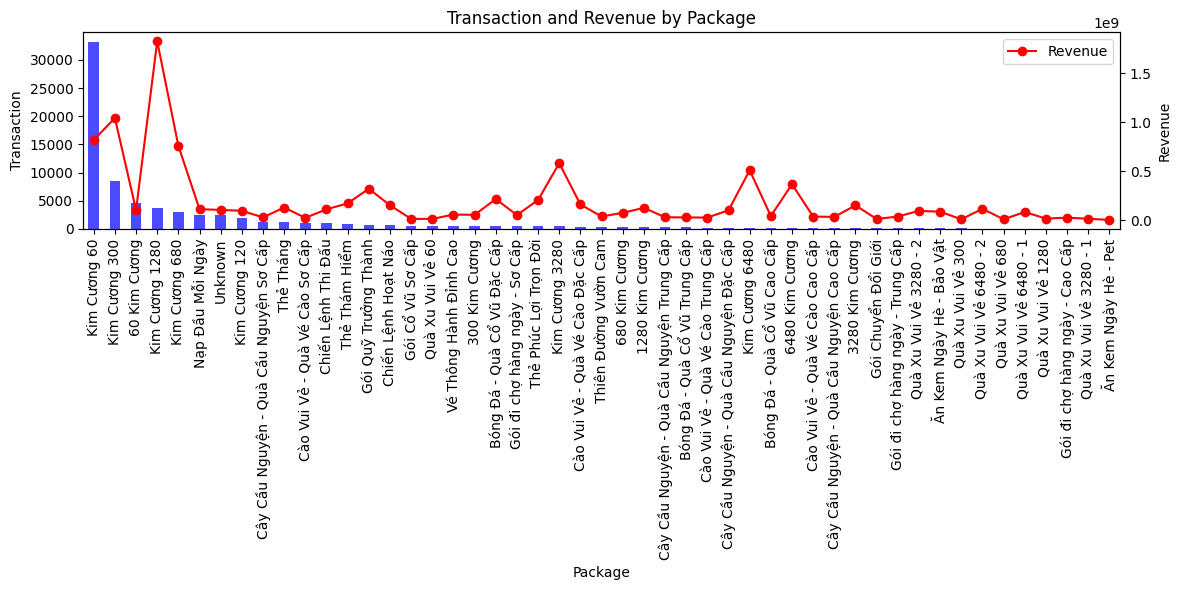

In [ ]:
import matplotlib.pyplot as plt

package_data2 = data_revenue[['package', 'TransID', 'total_money']]
package_stats = package_data2.groupby('package').agg({'TransID': 'count', 'total_money': 'sum'})

package_stats = package_stats.sort_values(by='TransID', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))
bars = package_stats['TransID'].plot(kind='bar', color='blue', alpha=0.7, label='Transaction')
plt.xlabel('Package')
plt.ylabel('Transaction')
plt.title('Transaction and Revenue by Package')

ax2 = ax1.twinx()
lines = package_stats['total_money'].plot(kind='line', color='red', marker='o',linestyle='-', label='Revenue', ax=ax2)
ax2.set_ylabel('Revenue')


plt.xticks(range(len(package_stats.index)), package_stats.index, rotation=45,fontsize=6, ha='right')
plt.legend(loc='upper right', labels=['Revenue'])
#plt.xticks(rotation=45)
plt.tight_layout()
#plt.xticks(rotation=90, fontsize=8)
plt.show()


#### RFD

In [ ]:
!gdown https://drive.google.com/file/d/1pTB2u57sTFgxYpVNOrvzAZroHjRwRk61/view?usp=sharing  --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1pTB2u57sTFgxYpVNOrvzAZroHjRwRk61
To: /content/Vw_GamePi_TimeOnline.csv
100% 235k/235k [00:00<00:00, 79.0MB/s]


In [ ]:
df_gp= pd.read_csv('/content/Vw_GamePi_TimeOnline.csv',encoding="ISO-8859-1",dtype={'server_id': str})
df_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LogID         2645 non-null   int64 
 1   ReportTime    2645 non-null   object
 2   server_id     2645 non-null   object
 3   totalMinutes  2645 non-null   int64 
 4   CreatedTime   2645 non-null   object
 5   UpdatedTime   2645 non-null   object
dtypes: int64(2), object(4)
memory usage: 124.1+ KB


In [ ]:
newgp_df= df_gp[(df_gp[[ 'CreatedTime', 'UpdatedTime']] >= '2023-07-19').all(axis=1) & ~df_gp['server_id'].isin([1, 50001])]
newgp_df.head()

,LogID,ReportTime,server_id,totalMinutes,CreatedTime,UpdatedTime
40,41,2023-07-19 00:00:00.000,10001,504080,2023-07-19 07:31:08.597,2023-07-20 08:01:12.457
41,42,2023-07-19 00:00:00.000,10003,266676,2023-07-19 09:31:08.707,2023-07-20 08:01:12.543
42,43,2023-07-19 00:00:00.000,10002,321550,2023-07-19 11:01:11.283,2023-07-20 08:01:12.410
43,44,2023-07-19 00:00:00.000,10004,224718,2023-07-19 14:31:08.873,2023-07-20 08:01:12.497
44,45,2023-07-19 00:00:00.000,10005,204664,2023-07-19 17:01:12.473,2023-07-20 08:01:12.630


In [ ]:
# newgp_df.rename(columns={'server_id': 'GameServer'}, inplace=True)
# df3gp= new_df.merge(newgp_df, on='GameServer', how='left')
# #df3 = pd.merge(new_df, new_df2, on='GameServer', how='left')
# df4=df3gp[['TransID', 'AccountID', 'GameServer', 'TopupDate', 'totalMinutes']]
# df4.head(10)

In [ ]:
# df4.info()

In [ ]:
# rfd = df4.to_csv('/content/gdrive/MyDrive/rfd.csv', index=False)
# rfd = pd.read_csv('/content/gdrive/MyDrive/rfd.csv')
# rfd.head(10)

In [ ]:
# df_recency1 = df4.groupby(by='AccountID',
#                             as_index=False)['TopupDate'].max()
# df_recency1.columns = ['AccountID', 'LastTopupDate']
# recent_date = df_recency['LastTopupDate'].max()
# df_recency1['Recency'] = df_recency1['LastTopupDate'].apply(
#     lambda x:(current_date - x).days)
# df_recency1.head(5)

In [ ]:
# df_recency1.info()

In [ ]:
# df_recency1.describe()

In [ ]:
# data1 = df_recency1
# interval= [1,8,15,22,29,34]
# df_recency1['recency_interval'] = pd.cut(df_recency1['Recency'], interval)

# distribution = df_recency1['recency_interval'].value_counts().sort_index()

# plt.figure(figsize=(12, 6))
# ax = distribution.plot(kind='bar', color='#007acc', alpha=0.7)
# ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# plt.xlabel(' (days)', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.title('Recency distribution', fontsize=14)
# plt.xticks(rotation=45, fontsize=10)
# plt.yticks(fontsize=10)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# for i in ax.patches:
#     ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 100),
#                 ha='center', fontsize=10, color='black')

# plt.tight_layout()
# plt.show()

In [ ]:
# df_frequency1 = df4.groupby('AccountID').TransID.count().reset_index()
# df_frequency1.columns = ['AccountID', 'Frequency']

# df_frequency1.head()

In [ ]:
# df_frequency1.describe()

In [ ]:
# data2 = df_frequency1
# interval = [0, 1, 2, 3, 5, 10, 30, 100, 1232]
# df_frequency1['frequency_interval'] = pd.cut(df_frequency1['Frequency'], interval)

# distribution = df_frequency1['frequency_interval'].value_counts().sort_index()

# plt.figure(figsize=(12, 6))
# ax = distribution.plot(kind='bar', color='#007acc', alpha=0.7)
# ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# plt.xlabel('Frequency Range', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.title('Frequency Distribution', fontsize=14)
# ax.legend(['Distribution'], fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.yticks(fontsize=10)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# for i in ax.patches:
#     ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 100),
#                 ha='center', fontsize=10, color='black')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()